 #  ---  AI4IE: DATA MINING ON REAL INDUSTRIAL DATASET  ---


The objective is to have a global experience of Data Mining on a real industrial dataset. To do so, we will follow the steps of CRISP-DM: the Cross Industry Standard Process for Data Mining.


 # 1) Business objectives

The “business objective” is to exploit the collected data and provide KPI (Key Performance Indicator) concerning productivity and the industrial performance. 
•	For productivity, the OEE (Overall Equipment Efficiency) will be computed. To do so, it is necessary to know how long the machine-tool has been machining. And, if time allows, to detect faulty parts.
•	For the industrial performance, the average cutting time per workpiece is interesting. Thus, the number of blanks (raw parts) should be detected automatically.
We will start with this 2nd objective, following a data-driven approach. Since the answer is unknown, the dataset is unlabeled and it should be determined by unsupervised machine learning. Lately, a model-based approach will be tried, through the combination of data analytics and knowledge integration (with business rules). 

 # 2) Data import and understanding 

The dataset were collected by EmmaTools device on a 5-axes machine-tool of Five Machining in an aeronautic company that manufactures structural parts in aluminum alloy. The matrix consists in 72 variables (columns), measured every tenth of a second (rows), during one day of industrial production.

 Data is presented in data777.CSV file. To facilitate the use, it will be store in a Panda dataFrame.

In [3]:
# Import of the needed libraires
#graphical librairies

import matplotlib as mpl
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import figure, subplot, hist, xlim, show, plot
%matplotlib inline

#data librairies 

import pandas as pd
import pylab as pl
import numpy as np

from pandas.plotting import scatter_matrix
from pandas.plotting import boxplot
from pandas.plotting import parallel_coordinates

from scipy.io import loadmat

In [4]:
#data import from data777.CSV and creation of panda object

HSM_data = pd.read_csv('data777.csv')

In [6]:
print(HSM_data)

           tpsT    tps B       date  id_ProgP  id pc  mode  id_outil  n outil  \
0       5560779  4105603  190312004        31     69     2         0        0   
1       5560780  4105603  190312005        31     69     2         0        0   
2       5560781  4105603  190312006        31     69     2         0        0   
3       5560782  4105603  190312007        31     69     2         0        0   
4       5560783  4105603  190312008        31     69     2         0        0   
...         ...      ...        ...       ...    ...   ...       ...      ...   
862569  6423348  4802871  192409145        36     74     2        22        6   
862570  6423349  4802872  192409152        36     74     2        22        6   
862571  6423350  4802873  192409153        36     74     2        22        6   
862572  6423351  4802874  192409154        36     74     2        22        6   
862573  6423352  4802875  192409155        36     74     2        22        6   

        usure outil  nligne

Check that import went well: 
- Display the variable names, 
- Check the size of the dataset in the "variable explorer" 
- And visualize the production schedule that day, through the sequence of part programs 'id_ProgP'.

In [9]:
# Visualise the variable names (labels) and the first lines values

HSM_data.head()

tpsT    tps B       date  id_ProgP  id pc  mode  id_outil  n outil  \
0  5560779  4105603  190312004        31     69     2         0        0   
1  5560780  4105603  190312005        31     69     2         0        0   
2  5560781  4105603  190312006        31     69     2         0        0   
3  5560782  4105603  190312007        31     69     2         0        0   
4  5560783  4105603  190312008        31     69     2         0        0   

   usure outil  nligne  ...  FFT_15  FFT_16  FFT_17  FFT_18  FFT_19  FFT_20  \
0           20       0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
1           20       0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2           20       0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
3           20       0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
4           20       0  ...     0.0     0.0     0.0     0.0     0.0     0.0   

   FFT_21  FFT_22  FFT_23  FFT_24  
0     0.0     0.0     0.0     0.0  
1     0.0     0.0     0.0     0.0  
2     0.0     0.0     0.0     0.0  
3     0.0     0.0     0.0     0.0  
4     0.0     0.0     0.0     0.0  

[5 rows x 72 columns]

In [10]:
# print the list of the variable names

print(HSM_data.keys())

Index(['tpsT', 'tps B', 'date', 'id_ProgP', 'id pc', 'mode', 'id_outil',
       'n outil', 'usure outil', 'nligne', 'nbloc', 'Abloc', 'Cbloc', 'Temp_1',
       'Temp_2', 'Temp_3', 'Temp_4', 'Arms_1', 'Arms_2', 'Arms_3', 'Arms_4',
       'Apic_1', 'Apic_2', 'Apic_3', 'Apic_4', 'Vrms_1', 'Vrms_2', 'Vrms_3',
       'Vrms_4', 'Vpic_1', 'Vpic_2', 'Vpic_3', 'Vpic_4', 'PosX', 'PosY',
       'PosZ', 'PosA', 'PosC', 'VitX', 'VitY', 'VitZ', 'VitA', 'VitC', 'Vf',
       'N', 'P', '%Vf', '%N', 'FFT_1', 'FFT_2', 'FFT_3', 'FFT_4', 'FFT_5',
       'FFT_6', 'FFT_7', 'FFT_8', 'FFT_9', 'FFT_10', 'FFT_11', 'FFT_12',
       'FFT_13', 'FFT_14', 'FFT_15', 'FFT_16', 'FFT_17', 'FFT_18', 'FFT_19',
       'FFT_20', 'FFT_21', 'FFT_22', 'FFT_23', 'FFT_24'],
      dtype='object')


In [14]:
# length of the dataset?

# Find the length of the dataset
dataset_length = len(HSM_data)

# Print the length of the dataset
print("Length of the Dataset:", dataset_length)


Length of the Dataset: 862574


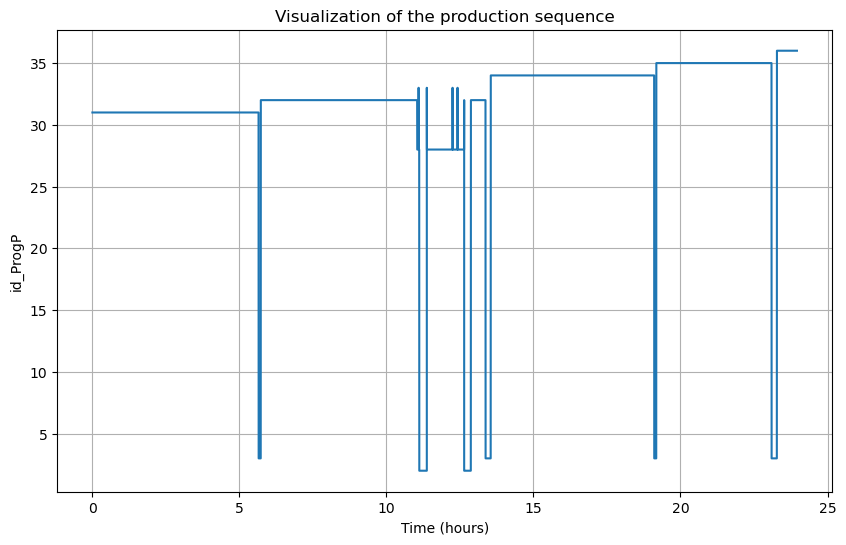

In [11]:
## Visualisation of the production sequence:

## There are 862574 length of data

#tmp=np.arange(0,nb_specimen*0.1,0.1)
#tmpH=tmp/3600
#tmpH # can be imported in DataFrame for abscissa x=..

# Define the number of specimens
nb_specimen = 862574

# Create a time array with 0.1 second intervals
tmp = np.arange(0, nb_specimen * 0.1, 0.1)

# Convert time to hours
tmpH = tmp / 3600

# Assuming you have a DataFrame named 'data' with a column named 'id_ProgP'
id_ProgP = HSM_data['id_ProgP']

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(tmpH, id_ProgP)
plt.xlabel('Time (hours)')
plt.ylabel('id_ProgP')
plt.title('Visualization of the production sequence')
plt.grid(True)
plt.show()

#data_panda.plot(y='VariableName_XXX')

In [13]:
# Production Sequence of 'id_ProgP'

print(HSM_data['id_ProgP'])

0         31
1         31
2         31
3         31
4         31
          ..
862569    36
862570    36
862571    36
862572    36
862573    36
Name: id_ProgP, Length: 862574, dtype: int64


# Objective 1: Number of parts machined

The objective is to determine how many parts were machined on each pallet, by unsupervised machine learning. Clustering will be performed on data set of machine-tool motion. 
In this section, 2 variables will be used as input of the Machine Learning, the output consists in determining the K number of clusters. 

## Data Selection
Firstly, select a subset of data: during id_ProgP=32, and then for X & Y variables of current position ('PosX',...).


## Visualization
Visualization enables to better understand the data and to verify the need of pre-treatments.
Here df.plot can be used and we focus on Program n°32.

In [14]:
# Data Selection:

filtered_df = HSM_data[HSM_data['id_ProgP'] == 32]
print(filtered_df)

           tpsT    tps B       date  id_ProgP  id pc  mode  id_outil  n outil  \
206071  5766850  4292619  191212597        32     70     2         0        0   
206072  5766851  4292619  191212598        32     70     2         0        0   
206073  5766852  4292619  191212599        32     70     2         0        0   
206074  5766853  4292619  191212600        32     70     2         0        0   
206075  5766854  4292619  191212601        32     70     2         0        0   
...         ...      ...        ...       ...    ...   ...       ...      ...   
481254  6042033  4473434  191717433        32     70     2         7        0   
481255  6042034  4473434  191717440        32     70     2         7        0   
481256  6042035  4473434  191717441        32     70     2         7        0   
481257  6042036  4473434  191717442        32     70     2         7        0   
481258  6042037  4473434  191717443        32     70     2         7        0   

        usure outil  nligne

In [ ]:
# To facilitate futur use, we can create a set with the variables labels, 
# Input data for Machine Learning.
Input_cols = ['PosX','PosY','PosZ']

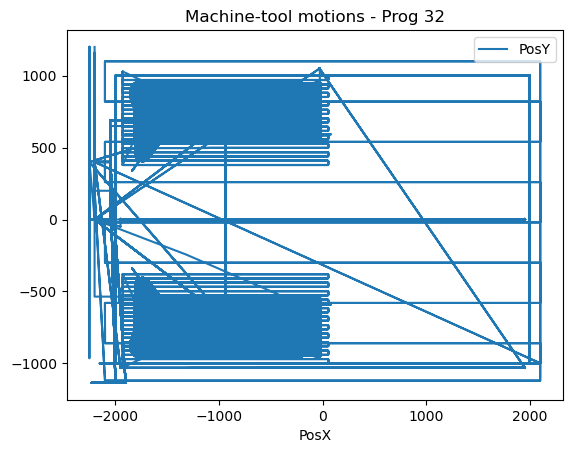

In [15]:
# Visualize the machine-tool motions with df.plot:
# df.plot(x='var1', y='var2') 
# plt.title('Machine-tool motions - Prog 32') 
# plt.show()

# Note that lately, scatter is more suitable for cluster visualization. 
#df.plot(kind="scatter", x='var1', y='var2') 

# Visualize the machine-tool motions with df.plot:
filtered_df.plot(x='PosX', y='PosY')
plt.title('Machine-tool motions - Prog 32')
plt.show()

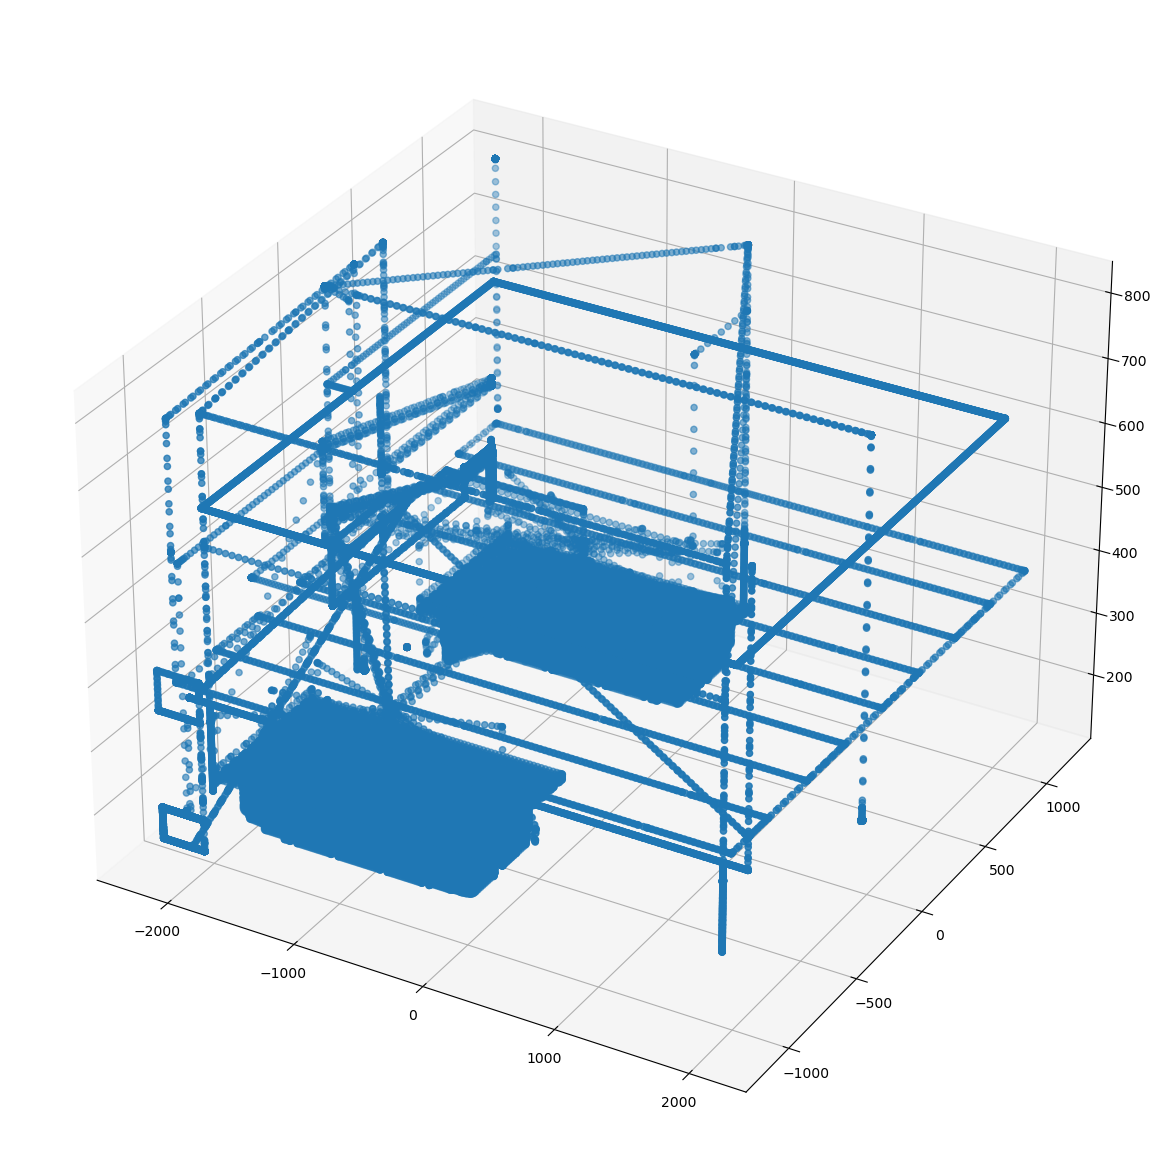

In [17]:
# If you want to make a 3D plot, 'PosZ' should be added to the data selection

fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')
ax.scatter3D(filtered_df['PosX'], filtered_df['PosY'], filtered_df['PosZ'])
plt.show()

In [19]:
# Selected Data

filtered_df = HSM_data[HSM_data['id_ProgP'] == 32]

# Select only two specific columns
selected_columns = ['PosX', 'PosY','PosZ']
filtered_dff =filtered_df[selected_columns]
print(filtered_dff)

            PosX      PosY     PosZ
206071 -2200.028  1199.989  800.002
206072 -2200.028  1199.989  800.002
206073 -2200.028  1199.989  800.002
206074 -2200.028  1199.989  800.002
206075 -2200.028  1199.989  800.002
...          ...       ...      ...
481254 -2200.028   199.993  800.002
481255 -2200.028   199.993  800.002
481256 -2200.028   199.993  800.002
481257 -2200.028   199.993  800.002
481258 -2200.028   199.993  800.002

[209585 rows x 3 columns]


## K-Means

In order to determine how many parts were machined on each pallet, by unsupervised machine learning, a clustering will be performed on data set of machine-tool motion. 2 variables will be used as input of the Machine Learning, the output consists in different k number of clusters. k should be optimized to determine the probable number of workpieces (clusters in the dataset).
A common technic is k-means, where k is the number of cluster. The centroid is the center of the cluster.

The algorithm is:
-Initialization with k centroids (randomly)
-WHILE clustering is unstable DO: 
   -  Affect each observation to the cluster of which the center is the closest
   -  Compute new cluster centers (average position)

<img src="image-20231127-234233.png" width="" align="" />

<img src="image-20231127-235853.png" width="" align="" />

The 'inertia' refers to the intra-cluster variance (related to the sum of the distances between a centroid and all the points belonging to its cluster).

The probable number of clusters K* can then be determined by the elbow method:

<img src="image-20231127-235954.png" width="" align="" />

### Initialization

Try the k-means algorithm of ScikitLearn on the selected subdataset, with for example 3 clusters. 
https://scikit-learn.org/stable/modules/clustering.html#clustering

In [32]:
from sklearn import cluster
from sklearn.cluster import KMeans 
from sklearn.metrics import completeness_score, homogeneity_score

In [33]:
#definition of the colors used for visualization 
color_dict_cluster={ 1:'r',2:'g' ,3:'b',4:'y',5:'c',6:'m',7:'k',8:'orange',0:'teal'}

In [34]:
## First tests of KMeans, progressively:

# define the cluster model (with max_iter=50,init='random')
kmeans = KMeans(n_clusters=3, max_iter=50, init='random')

# train the kmeans model (centroids) from the dataset
kmeans.fit(filtered_dff)

# where are the centroids positions? (kmeans.cluster_centers_)  
centroids = kmeans.cluster_centers_

# compute the inertia = intra-cluster variance (kmeans.inertia_)
inertia = kmeans.inertia_

# prediction: affect each observation of the dataset, to the closest centroid (kmeans.predict)
predictions = kmeans.predict(filtered_dff)

# from the cluster label of each point in the dataset (array), make a dataFrame and concatenate to the dataset
#pred = pd.dataframe(VarXXX)
#pred.columns = 'predicted_cluster'
#df = pd.concat([df,pred], axis = 1)
cluster_labels = pd.DataFrame({'predicted_cluster': predictions})
filtered_df = pd.concat([filtered_dff, cluster_labels], axis=1)

# similarly, make a dataFrame with the centroid positions
centroids_df = pd.DataFrame(centroids)

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [35]:
centroids_df.columns=[ 'PosX', 'PosY','PosZ']
print(centroids_df)

          PosX        PosY        PosZ
0  -389.177642  767.404273  236.253804
1  -858.591772 -772.225175  255.577254
2 -1815.327023  684.009951  323.513455


In [36]:
print(predictions)

[2 2 2 ... 2 2 2]


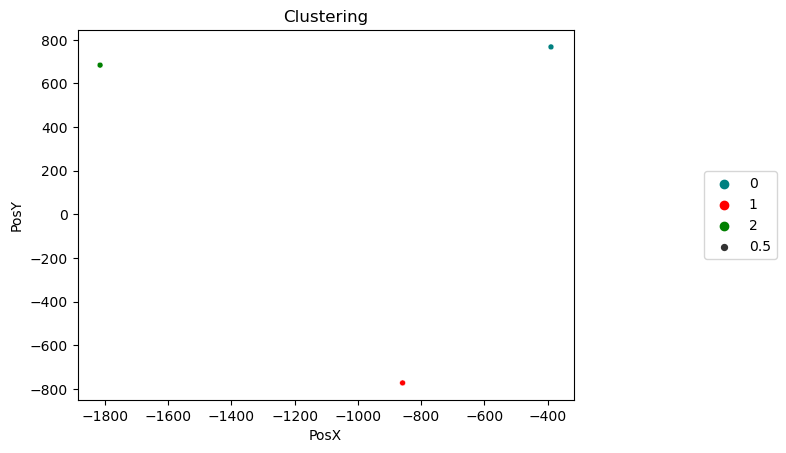

In [39]:
## Visualize the results of clustering:

sns.scatterplot( data=centroids_df, x='PosX', y='PosY', hue=centroids_df.index, size=0.5, palette=color_dict_cluster)

#sns.scatterplot(x='PosX', y='PosY', hue='predicted_cluster', size=5, palette=c'predicted_cluster'olor_dict_cluster, data=df_centroids)
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Clustering')
plt.show()

### Normalisation 

To garanty that the use of Euclidan distances will not favor one of the characteristics, we need to work on normalized data.

In [42]:
import copy

# Reset the index
Norm_32 = centroids_df.reset_index()

# Print column names
print(Norm_32.keys())

# Define Input_cols (excluding 'index')
Input_cols = Norm_32.columns.difference(['index'])

# Normalization
Norm_32[Input_cols] = (Norm_32[Input_cols] - Norm_32[Input_cols].min()) / (Norm_32[Input_cols].max() - Norm_32[Input_cols].min())

# Print normalized values
print(Norm_32[Input_cols])

Index(['index', 'PosX', 'PosY', 'PosZ'], dtype='object')
       PosX      PosY      PosZ
0  1.000000  1.000000  0.000000
1  0.670852  0.000000  0.221448
2  0.000000  0.945835  1.000000


### Elbow method

Make a FOR loop (for k in range(0,max_clusters) ), to compute automatically k-means, make a new plot for each clustering, and finally use the elbow method (based on the intra-cluster variance) to determine the probable number of clusters.


[1 2 3 4 5 6 7 8 9]


C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nithi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


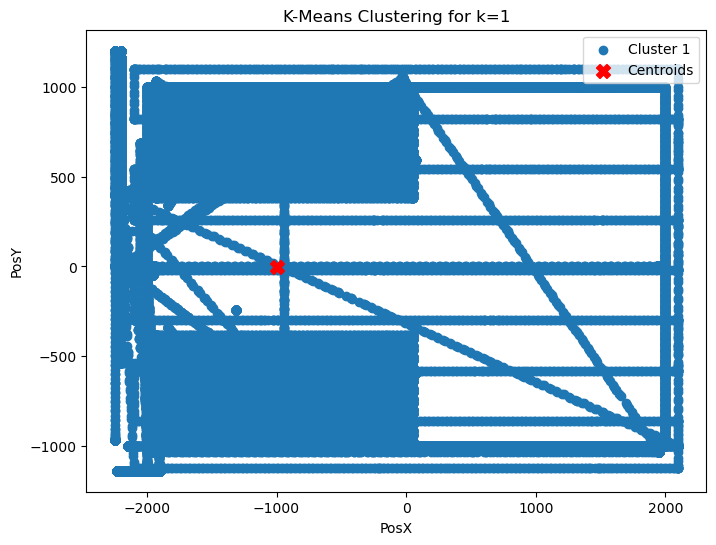

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nithi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


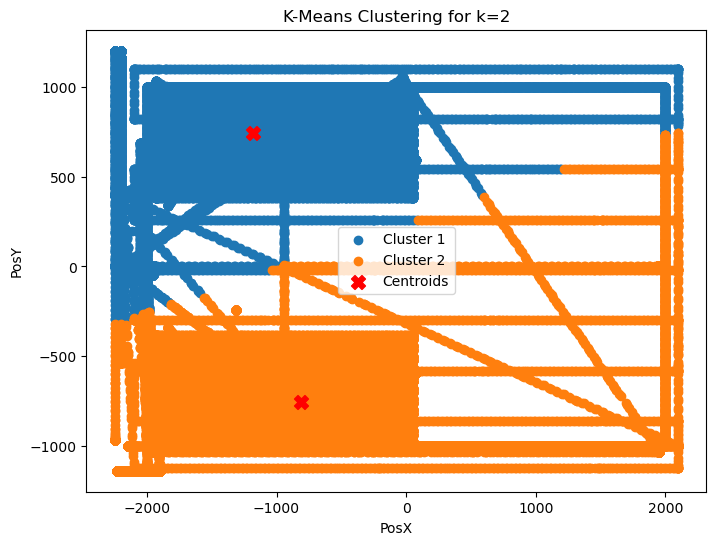

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nithi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


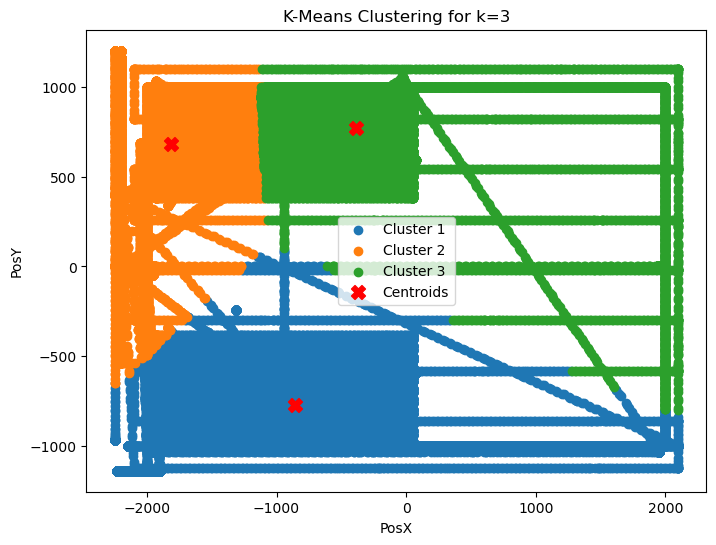

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nithi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


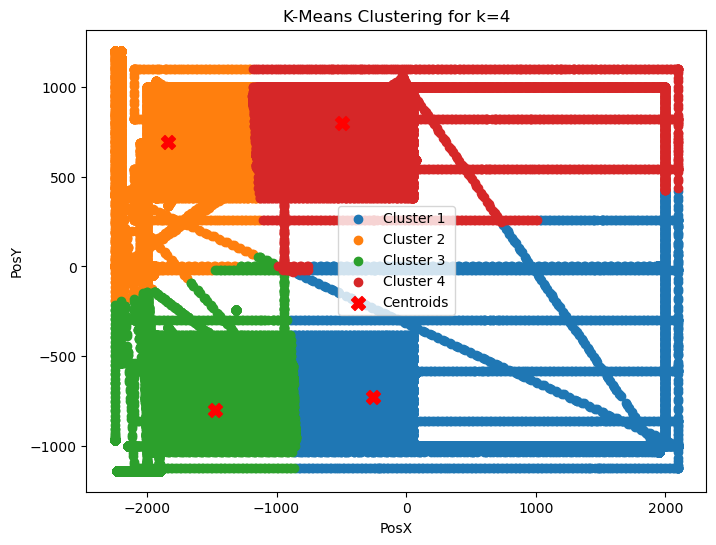

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nithi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


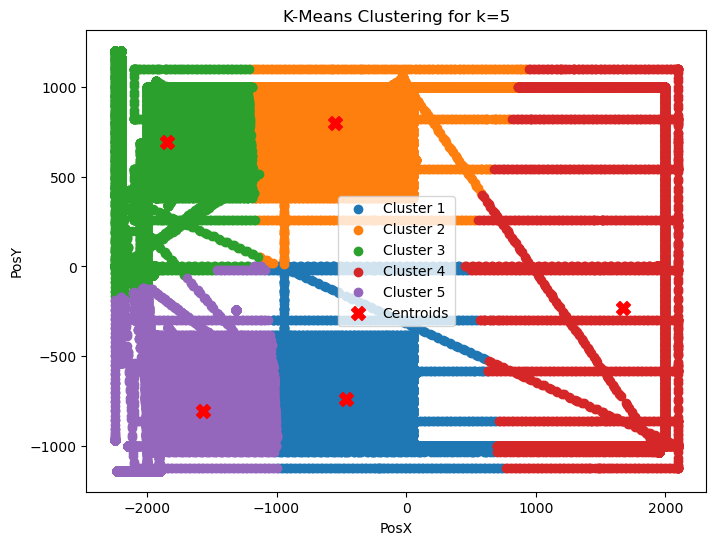

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nithi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


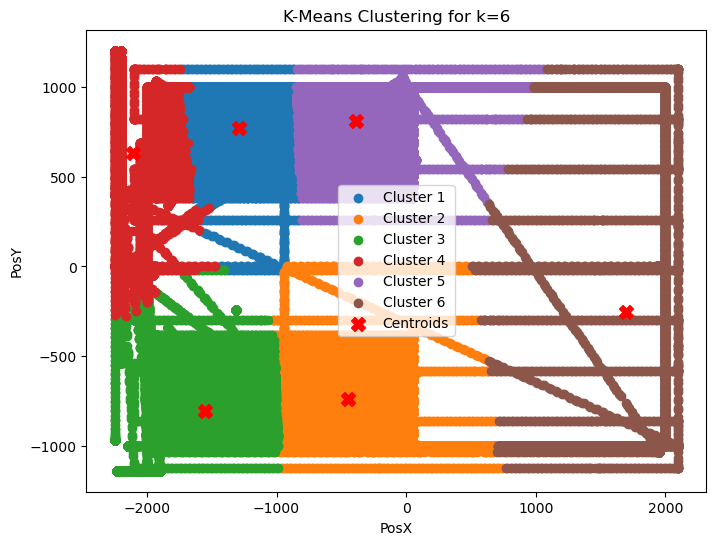

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nithi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


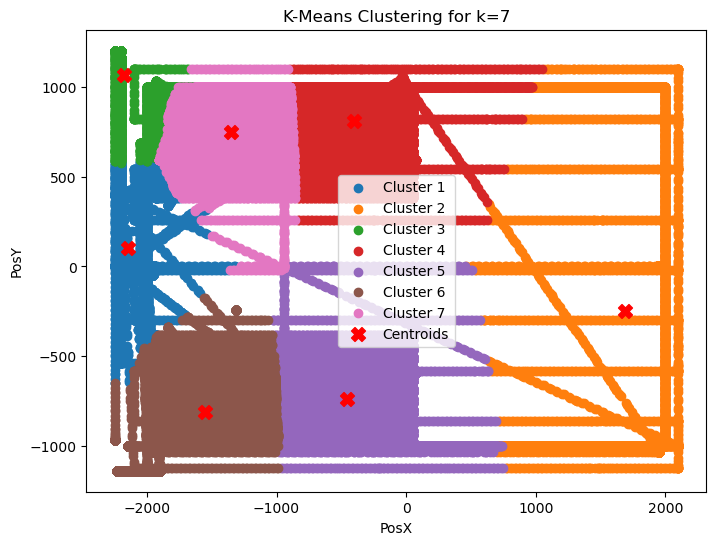

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nithi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


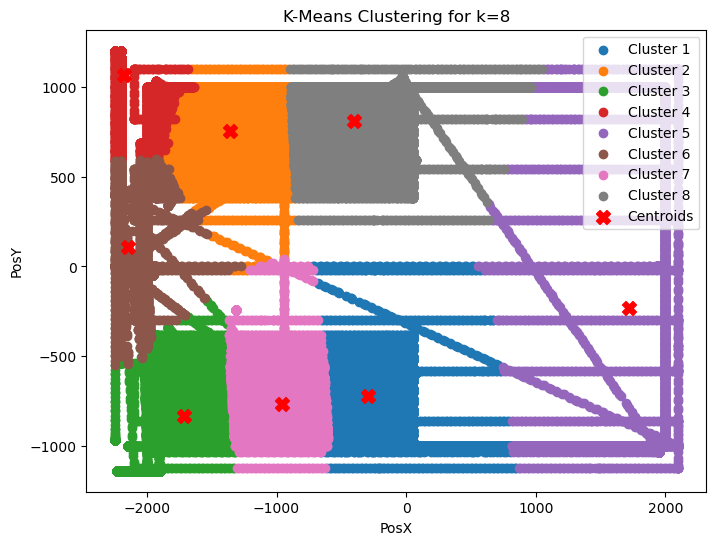

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nithi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


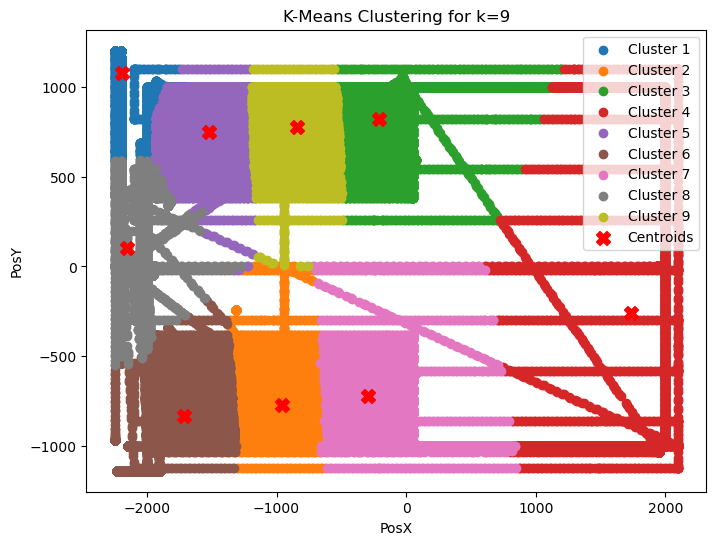

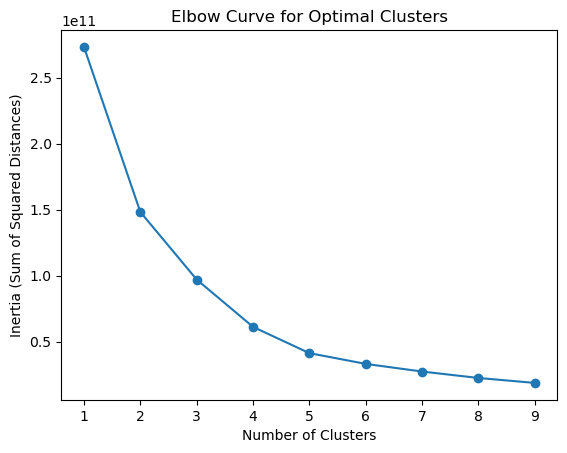

Optimal number of clusters: 2
Optimal number of clusters: 2


In [45]:
def find_optimal_clusters(range_n_clusters, ssd):
    deltas = np.diff(ssd, 2)
    elbow_index = np.argmax(deltas) + 2
    optimal_clusters = range_n_clusters[elbow_index - 1]
    return optimal_clusters

def My_function_kmeans_elbow(max_clusters, df):
    ssd = []
    range_n_clusters = np.arange(1, max_clusters + 1, 1)
    print(range_n_clusters)
    for num_clusters in range_n_clusters:
        
        # Launch the clustering
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(df)
        ssd.append(kmeans.inertia_)

        # Plotting the clustering
        plt.figure(figsize=(8, 6))
        for i in range(num_clusters):
            cluster_indices = np.where(kmeans.labels_ == i)[0]
            plt.scatter(df.iloc[cluster_indices, 0], df.iloc[cluster_indices, 1], label=f'Cluster {i + 1}')
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X', label='Centroids')
        plt.title(f'K-Means Clustering for k={num_clusters}')
        plt.xlabel('PosX')
        plt.ylabel('PosY')
        plt.legend()
        plt.show()

    # Plotting Elbow Curve for Optimal Clusters
    plt.plot(range_n_clusters, ssd, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia (Sum of Squared Distances)')
    plt.title('Elbow Curve for Optimal Clusters')
    plt.show()

    # Find the optimal number of clusters
    optimal_clusters = find_optimal_clusters(range_n_clusters, ssd)
    print("Optimal number of clusters:", optimal_clusters)
    return optimal_clusters

# Example usage
# Assuming filtered_dff is defined somewhere in your code
optimal_clusters = My_function_kmeans_elbow(9, filtered_dff)
print("Optimal number of clusters:", optimal_clusters)

How many clusters are suggestes by the Elbow?

Lets try to apply the trained cluster model for program 35 and determine if it makes sense.

### Application on Prog 35

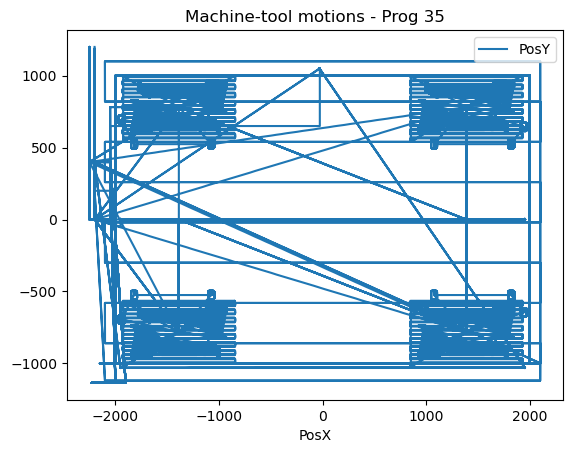

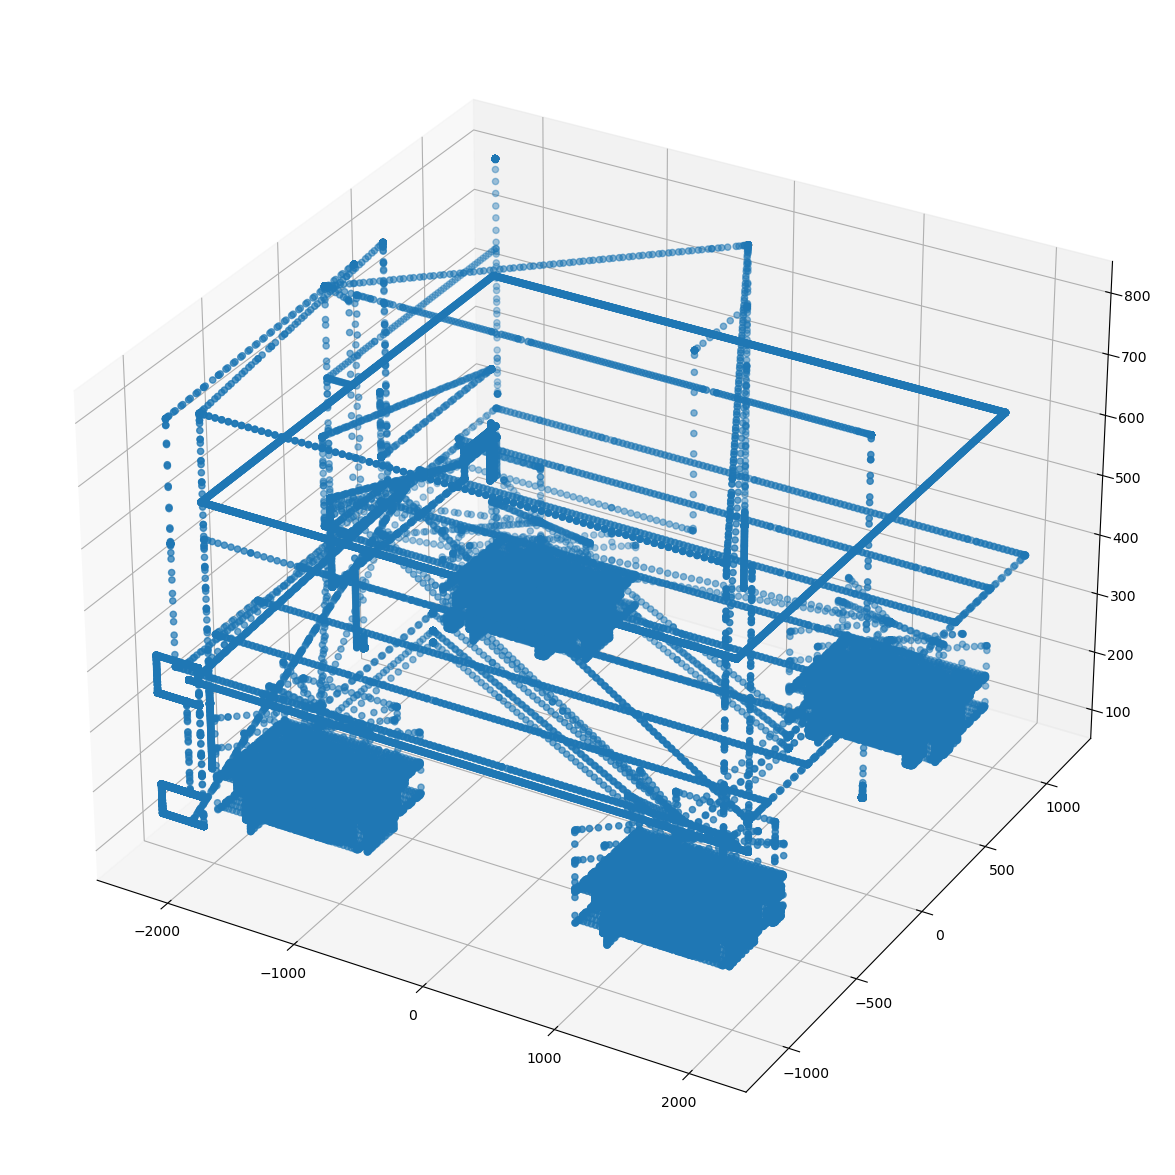

In [48]:
# select the new subdataset, corresponding to Program n°35.
filtered_data = HSM_data[HSM_data['id_ProgP'] == 35]
Input_cols = ['PosX','PosY','PosZ']

# Visualize the machine-tool motions with df.plot:
filtered_data.plot(x='PosX', y='PosY')
plt.title('Machine-tool motions - Prog 35')
plt.show()

# If you want to make a 3D plot, 'PosZ' should be added to the data selection
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')
ax.scatter3D(filtered_data['PosX'], filtered_data['PosY'], filtered_data['PosZ'])
plt.show()

## Clustering for a 2nd program : n°35

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


           tpsT         tps B          date  id_ProgP      id pc  mode  \
0  6.371834e+06  4.765310e+06  1.923176e+08      35.0  64.629486   2.0   
1  6.275676e+06  4.680242e+06  1.921425e+08      35.0  56.372229   2.0   
2  6.325864e+06  4.725865e+06  1.922334e+08      35.0  46.141769   2.0   

    id_outil   n outil  usure outil        nligne  ...       FFT_15    FFT_16  \
0  10.547548  3.275541   164.521233  23042.897319  ...  2512.255414  2.741424   
1  16.473502  2.469923   225.458372   4110.116423  ...  2105.873216  1.879161   
2  19.563834  3.016425   147.808214   9028.464270  ...  2358.302162  1.054745   

     FFT_17    FFT_18       FFT_19       FFT_20       FFT_21    FFT_22  \
0  1.733755  1.234312  1312.041034  1524.936743  1495.850467  3.729713   
1  1.289136  1.025263  1150.353093  1546.092871  1563.560600  2.228963   
2  0.669084  0.533204  1522.364905  1833.640563  1822.309933  1.208282   

     FFT_23    FFT_24  
0  1.711569  1.387358  
1  1.566943  1.134792  
2  0.7249

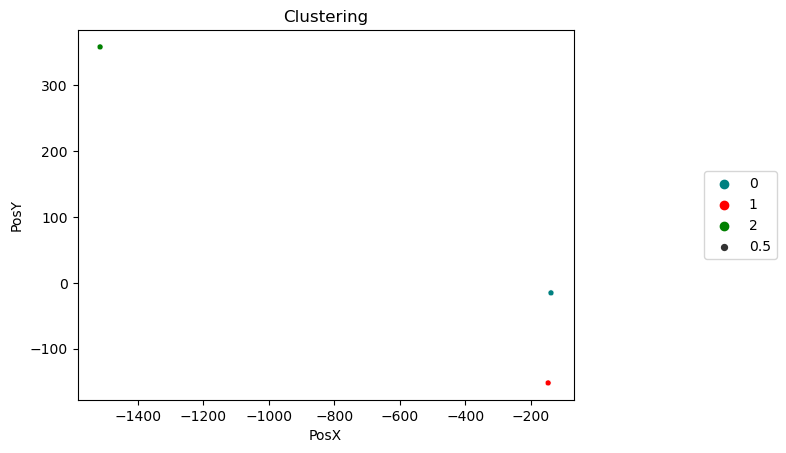

In [49]:
# Clustering on Program 35:

# Appply the kmean model previously trained on this new dataset

# Define the cluster model (with max_iter=50,init='random')
kmeans = KMeans(n_clusters=3, max_iter=50, init='random')

# Train the kmeans model (centroids) from the dataset
kmeans.fit(filtered_data)

# Where are the centroids positions? (kmeans.cluster_centers_)
centroids = kmeans.cluster_centers_

# Compute the inertia = intra-cluster variance (kmeans.inertia_)
inertia = kmeans.inertia_

# Prediction: affect each observation of the dataset, to the closest centroid (kmeans.predict)
predictions = kmeans.predict(filtered_data)

# From the cluster label of each point in the dataset (array), make a DataFrame and concatenate to the dataset
cluster_labels = pd.DataFrame({'predicted_cluster': predictions})
filtered_dff = pd.concat([filtered_data, cluster_labels], axis=1)

# Similarly, make a DataFrame with the centroid positions
centroids_dff = pd.DataFrame(centroids)

centroids_dff.columns=['tpsT', 'tps B', 'date', 'id_ProgP', 'id pc', 'mode', 'id_outil',
 'n outil', 'usure outil', 'nligne', 'nbloc', 'Abloc', 'Cbloc', 'Temp_1',
 'Temp_2', 'Temp_3', 'Temp_4', 'Arms_1', 'Arms_2', 'Arms_3', 'Arms_4',
 'Apic_1', 'Apic_2', 'Apic_3', 'Apic_4', 'Vrms_1', 'Vrms_2', 'Vrms_3',
 'Vrms_4', 'Vpic_1', 'Vpic_2', 'Vpic_3', 'Vpic_4', 'PosX', 'PosY',
 'PosZ', 'PosA', 'PosC', 'VitX', 'VitY', 'VitZ', 'VitA', 'VitC', 'Vf',
 'N', 'P', '%Vf', '%N', 'FFT_1', 'FFT_2', 'FFT_3', 'FFT_4', 'FFT_5',
 'FFT_6', 'FFT_7', 'FFT_8', 'FFT_9', 'FFT_10', 'FFT_11', 'FFT_12',
 'FFT_13', 'FFT_14', 'FFT_15', 'FFT_16', 'FFT_17', 'FFT_18', 'FFT_19',
 'FFT_20', 'FFT_21', 'FFT_22', 'FFT_23', 'FFT_24']
print(centroids_dff)

# Visualize the ressults. Are they good?
sns.scatterplot( data=centroids_dff, x='PosX', y='PosY', hue=centroids_dff.index, size=0.5, palette=color_dict_cluster)

#sns.scatterplot(x='PosX', y='PosY', hue='predicted_cluster', size=5, palette=c'predicted_cluster'olor_dict_cluster, data=df_centroids)
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Clustering')
plt.show()

In [50]:
import copy
Norm_32 = centroids_dff.reset_index()
print(Norm_32.keys())

# Normalisation
Norm_32[Input_cols]=(Norm_32[Input_cols]-Norm_32[Input_cols].min())/(Norm_32[Input_cols].max()-Norm_32[Input_cols].min())
print(Norm_32[Input_cols])

Index(['index', 'tpsT', 'tps B', 'date', 'id_ProgP', 'id pc', 'mode',
       'id_outil', 'n outil', 'usure outil', 'nligne', 'nbloc', 'Abloc',
       'Cbloc', 'Temp_1', 'Temp_2', 'Temp_3', 'Temp_4', 'Arms_1', 'Arms_2',
       'Arms_3', 'Arms_4', 'Apic_1', 'Apic_2', 'Apic_3', 'Apic_4', 'Vrms_1',
       'Vrms_2', 'Vrms_3', 'Vrms_4', 'Vpic_1', 'Vpic_2', 'Vpic_3', 'Vpic_4',
       'PosX', 'PosY', 'PosZ', 'PosA', 'PosC', 'VitX', 'VitY', 'VitZ', 'VitA',
       'VitC', 'Vf', 'N', 'P', '%Vf', '%N', 'FFT_1', 'FFT_2', 'FFT_3', 'FFT_4',
       'FFT_5', 'FFT_6', 'FFT_7', 'FFT_8', 'FFT_9', 'FFT_10', 'FFT_11',
       'FFT_12', 'FFT_13', 'FFT_14', 'FFT_15', 'FFT_16', 'FFT_17', 'FFT_18',
       'FFT_19', 'FFT_20', 'FFT_21', 'FFT_22', 'FFT_23', 'FFT_24'],
      dtype='object')
       PosX      PosY      PosZ
0  1.000000  0.268017  0.000000
1  0.993687  0.000000  0.737122
2  0.000000  1.000000  1.000000


[1 2 3 4 5 6 7 8 9]


C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


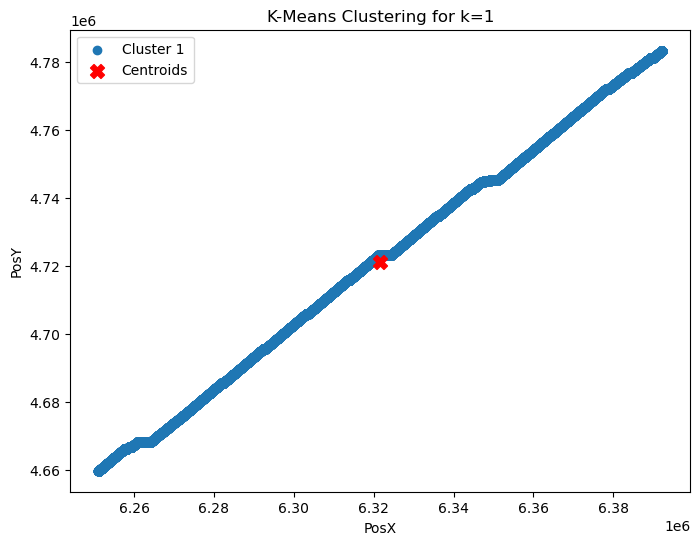

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


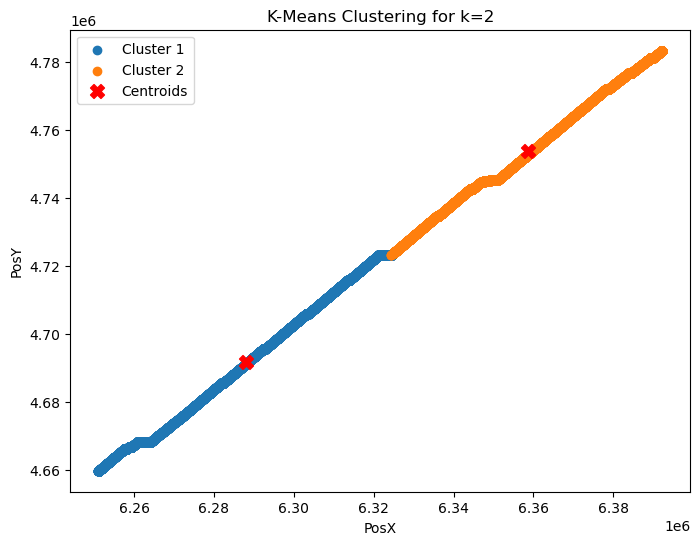

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


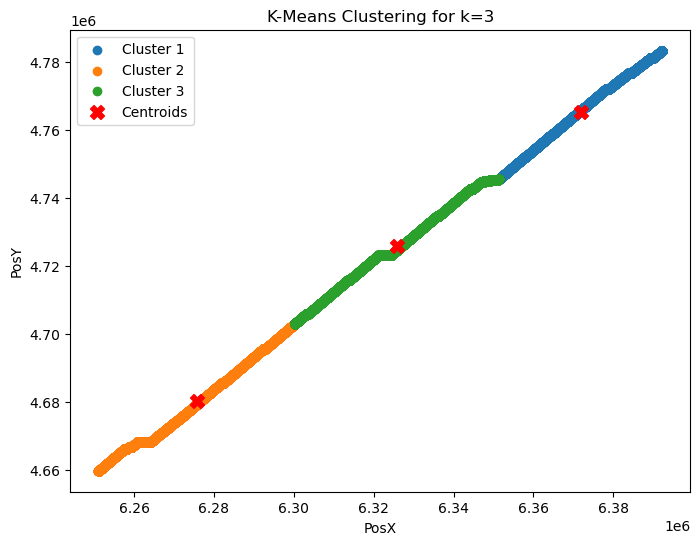

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


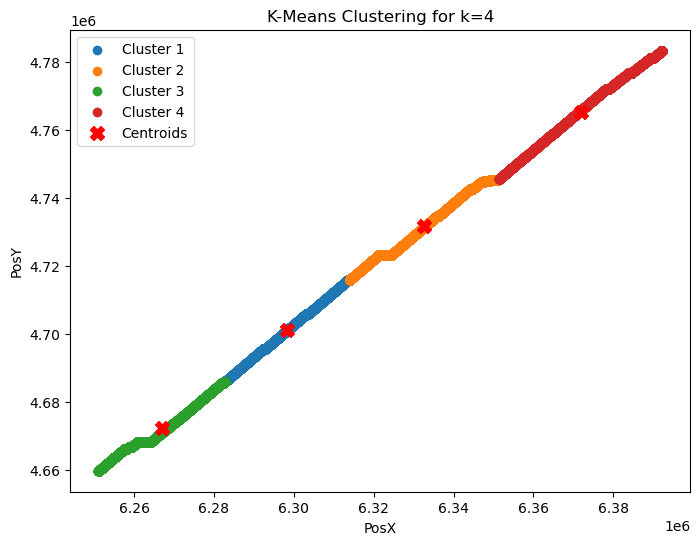

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


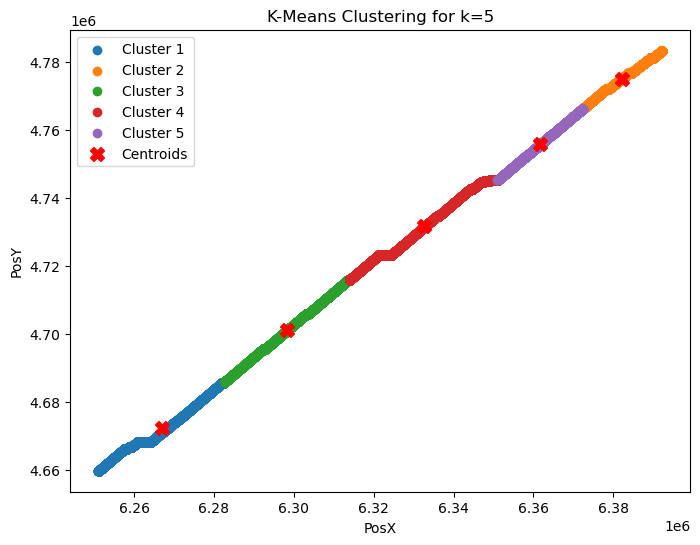

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


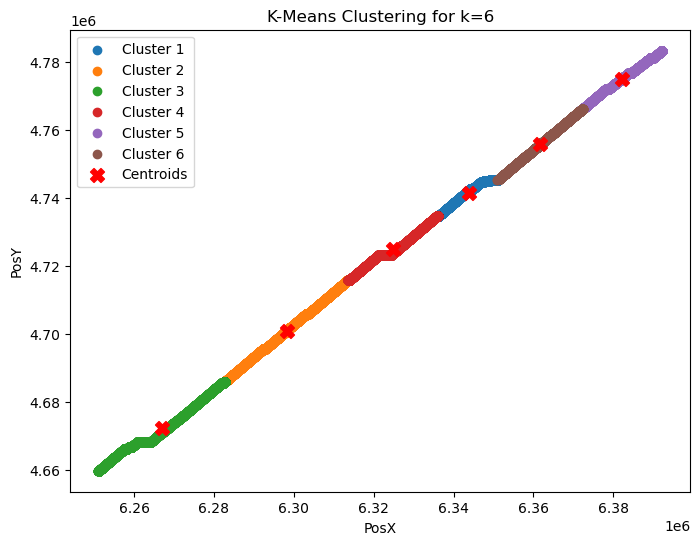

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


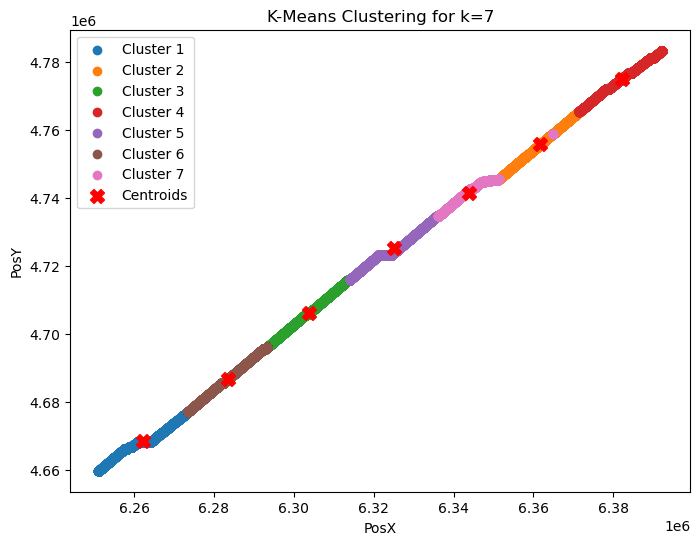

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


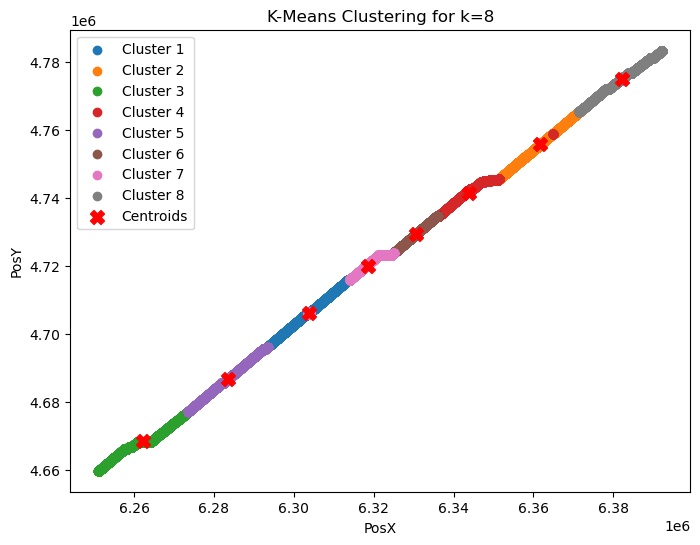

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


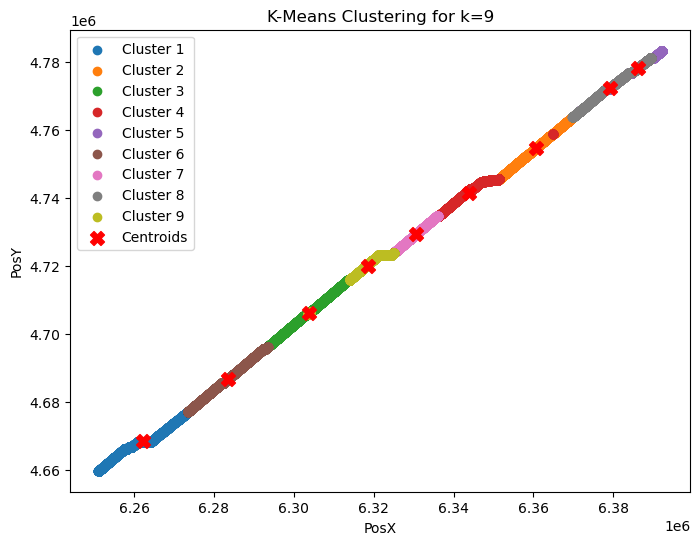

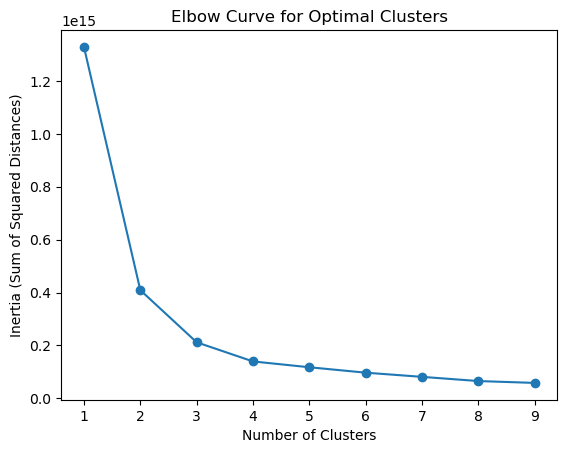

Optimal number of clusters: 2
Optimal number of clusters: 2


In [52]:
def find_optimal_clusters(range_n_clusters, ssd):
    deltas = np.diff(ssd, 2)
    elbow_index = np.argmax(deltas) + 2
    optimal_clusters = range_n_clusters[elbow_index - 1]
    return optimal_clusters

def My_function_kmeans_elbow(max_clusters, df):
    ssd = []
    range_n_clusters = np.arange(1, max_clusters + 1, 1)
    print(range_n_clusters)
    for num_clusters in range_n_clusters:
        # Launch the clustering
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(df)
        ssd.append(kmeans.inertia_)

        # Plotting the clustering
        plt.figure(figsize=(8, 6))
        for i in range(num_clusters):
            cluster_indices = np.where(kmeans.labels_ == i)[0]
            plt.scatter(df.iloc[cluster_indices, 0], df.iloc[cluster_indices, 1], label=f'Cluster {i + 1}')
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X', label='Centroids')
        plt.title(f'K-Means Clustering for k={num_clusters}')
        plt.xlabel('PosX')
        plt.ylabel('PosY')
        plt.legend()
        plt.show()

    # Plotting Elbow Curve for Optimal Clusters
    plt.plot(range_n_clusters, ssd, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia (Sum of Squared Distances)')
    plt.title('Elbow Curve for Optimal Clusters')
    plt.show()

    # Find the optimal number of clusters
    optimal_clusters = find_optimal_clusters(range_n_clusters, ssd)
    print("Optimal number of clusters:", optimal_clusters)
    return optimal_clusters

# Example usage
# Assuming filtered_dff is defined somewhere in your code
optimal_clusters = My_function_kmeans_elbow(9, filtered_data)
print("Optimal number of clusters:", optimal_clusters)


The clustering cannot be used per se, yet the method can be replicated




# GMM

An alternative to distance-based technics of clustering is statistical ones, such as Gaussian Mixture Model (GMM).




In [64]:
from sklearn import mixture
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

In [65]:
#funtion to draw mutlivariate Gaussian
def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.
    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.
    """
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

In [66]:
# Generate sample data (replace this with your actual data)

filtered_dff, _ = make_blobs(n_samples=300, centers=3, random_state=42)

In [67]:
# Tests of the GMM functions:

# define the GMM model
nb_GMM=3
gmm = GaussianMixture(n_components=nb_GMM, covariance_type="full")

# learning of the GMM model by EM algo (Expectation Maximisation)
gmm.fit(filtered_dff)

# result?
m=gmm.means_
cov=gmm.covariances_
w=gmm.weights_


C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [68]:
# apply the GMM model, as a classifier:
gmm.predict(filtered_dff)

array([1, 1, 2, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2,
       0, 1, 2, 1, 1, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0,
       2, 2, 1, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1, 2, 0, 2, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 2, 1, 2, 0, 1, 1, 2,
       0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1,
       0, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 1, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0, 1,
       2, 0, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       2, 1, 2, 2, 0, 0, 2, 0, 1, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1,
       1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 2,
       0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 2, 0, 0, 2, 1, 2, 0, 2, 1, 1], d

C:\Users\nithi\AppData\Local\Temp\ipykernel_65388\95453402.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=filtered_dff[:, 0], y=filtered_dff[:, 1], palette=color_dict_cluster)


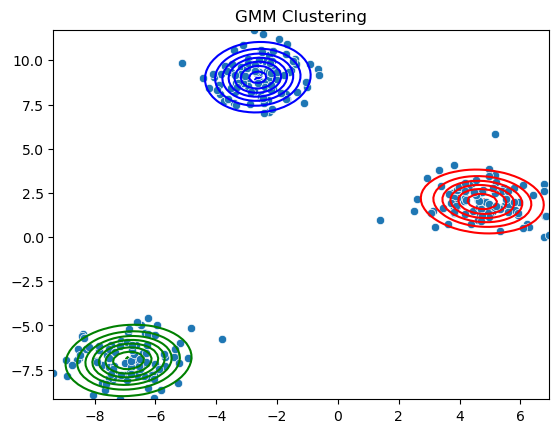

In [70]:
# Define colors for clusters (replace with your actual color choices)
color_dict_cluster = ['red', 'green', 'blue']

# Plotting of GMM
x = np.linspace(filtered_dff[:, 0].min(), filtered_dff[:, 0].max(), 100)
y = np.linspace(filtered_dff[:, 1].min(), filtered_dff[:, 1].max(), 100)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
for i in range(nb_GMM):
 mu_broadcast = np.expand_dims(m[i], axis=(0, 1))
 cov_inv = np.linalg.inv(cov[i])
    
 # Calculate the squared Mahalanobis distance directly
 diff = pos - mu_broadcast
 fac = np.sum(diff @ cov_inv * diff, axis=-1)
 Z = np.exp(-fac / 2) / np.sqrt((2 * np.pi)**2 * np.linalg.det(cov[i]))
 plt.contour(X, Y, Z, colors=color_dict_cluster[i])
 plt.scatter(m[i, 0], m[i, 1], marker='X', c=color_dict_cluster[i], s=30)
    
# Scatter plot of the original data
sns.scatterplot(x=filtered_dff[:, 0], y=filtered_dff[:, 1], palette=color_dict_cluster)
plt.title("GMM Clustering")
plt.show()



C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\nithi\AppData\Local\Temp\ipykernel_65388\1167243084.py:40: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=filtered_dff[:, 0], y=filtered_dff[:, 1], palette=color_dict_cluster)


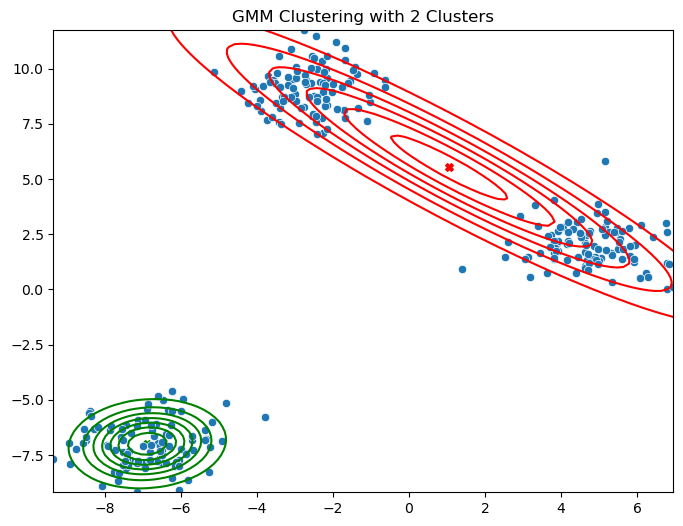

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\nithi\AppData\Local\Temp\ipykernel_65388\1167243084.py:40: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=filtered_dff[:, 0], y=filtered_dff[:, 1], palette=color_dict_cluster)


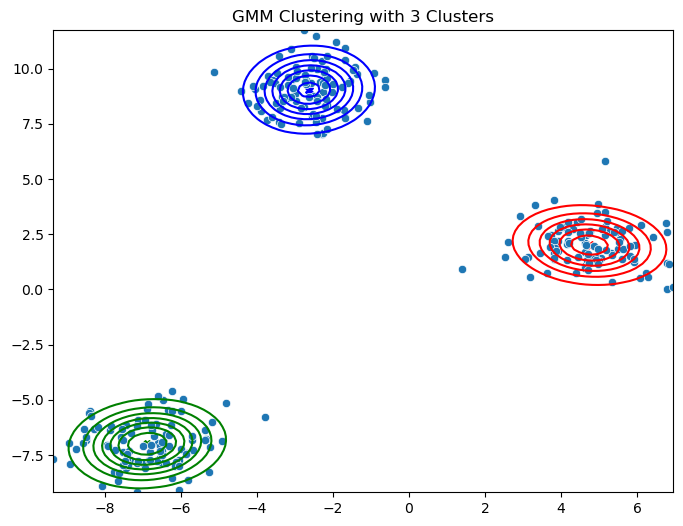

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\nithi\AppData\Local\Temp\ipykernel_65388\1167243084.py:40: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=filtered_dff[:, 0], y=filtered_dff[:, 1], palette=color_dict_cluster)


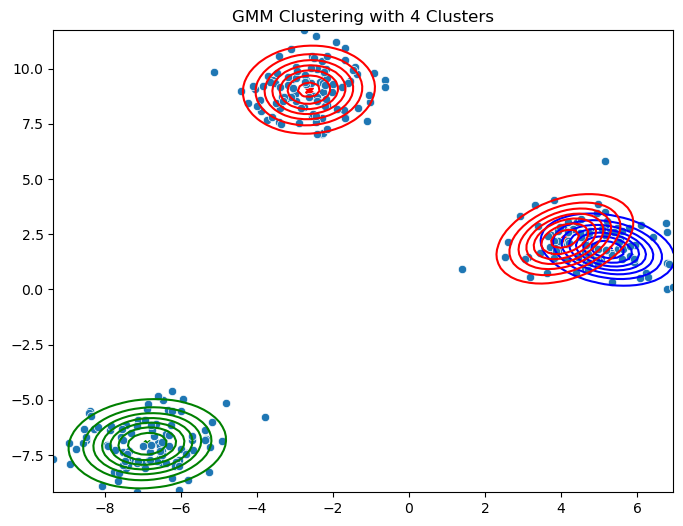

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\nithi\AppData\Local\Temp\ipykernel_65388\1167243084.py:40: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=filtered_dff[:, 0], y=filtered_dff[:, 1], palette=color_dict_cluster)


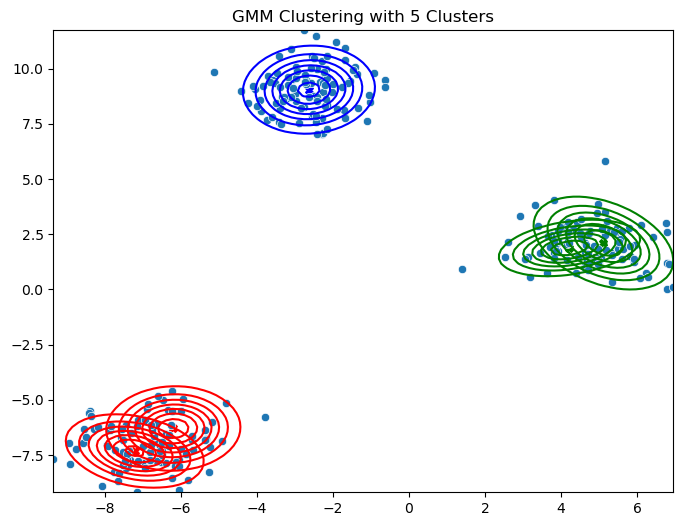

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\nithi\AppData\Local\Temp\ipykernel_65388\1167243084.py:40: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=filtered_dff[:, 0], y=filtered_dff[:, 1], palette=color_dict_cluster)


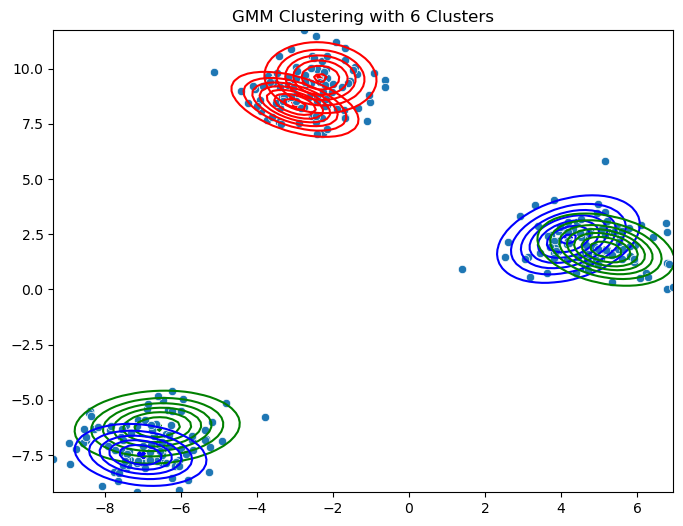

In [73]:
# Program a FOR loop for clustering with GMM and associated visualisations

# Optimise the clusters number
# Generate sample data (replace this with your actual data)
filtered_dff, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Define the range of components for GMM
min_clusters = 2
max_clusters = 6

# Plotting of GMM for different numbers of clusters
for nb_GMM in range(min_clusters, max_clusters + 1):
    
    # Fit the GMM model
    gmm = GaussianMixture(n_components=nb_GMM, covariance_type="full")
    gmm.fit(filtered_dff)
    
    # Get the GMM parameters
    m = gmm.means_
    cov = gmm.covariances_
    w = gmm.weights_
    
    # Define colors for clusters (replace with your actual color choices)
    color_dict_cluster = ['red', 'green', 'blue']

    # Adjust the colors if there are fewer colors than clusters
    color_dict_cluster *= (nb_GMM // len(color_dict_cluster)) + 1
    
    # Plotting of GMM
    x = np.linspace(filtered_dff[:, 0].min(), filtered_dff[:, 0].max(), 100)
    y = np.linspace(filtered_dff[:, 1].min(), filtered_dff[:, 1].max(), 100)
    X, Y = np.meshgrid(x, y)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y
    plt.figure(figsize=(8, 6))
    for i in range(nb_GMM):
        mu_broadcast = np.expand_dims(m[i], axis=(0, 1))
        cov_inv = np.linalg.inv(cov[i])
        
        # Calculate the squared Mahalanobis distance directly
        diff = pos - mu_broadcast
        fac = np.sum(diff @ cov_inv * diff, axis=-1)
        Z = multivariate_gaussian(pos, m[i], cov[i])
        plt.contour(X, Y, Z, colors=color_dict_cluster[i])
        plt.scatter(m[i, 0], m[i, 1], marker='X', c=color_dict_cluster[i], s=30)
        
    # Scatter plot of the original data
    sns.scatterplot(x=filtered_dff[:, 0], y=filtered_dff[:, 1], palette=color_dict_cluster)
    plt.title(f"GMM Clustering with {nb_GMM} Clusters")
    plt.show()

## Hierarchical Ascendant Classification 
(optional)

# Objective 2: productivity


The objective is to determine how long the machine-tool has been cutting, by unsupervised machine learning, and computation of the OEE. 
In this section, several variables will be used as input of the Machine Learning, the output consists in 2 clusters (k=2), corresponding to: the machine-tool is machining, or not. The performance of data-driven approach will be compared with a knowledge-based approach (that combines data and knowledge integration through business rules).


In [74]:
#select a sub-dataset associated the cutting process.

# Data Selection:

# Select only two specific columns
selected_columns = ['Vf', 'N']
cuttingdata =HSM_data[selected_columns]
print(cuttingdata)

               Vf          N
0           0.000      0.000
1           0.000      0.000
2           0.000      0.000
3           0.000      0.000
4           0.000      0.000
...           ...        ...
862569  17789.728  23723.903
862570  17789.728  23717.312
862571  17789.728  23718.044
862572  17789.728  23725.368
862573  17789.728  23720.608

[862574 rows x 2 columns]


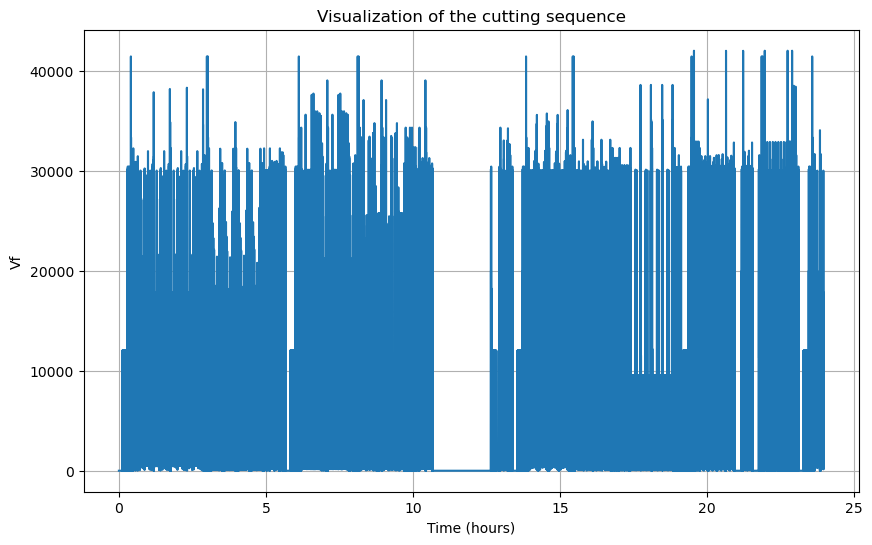

In [75]:
## There are 862574 length of data

## Visualisation of the production sequence:
#tmp=np.arange(0,nb_specimen*0.1,0.1)
#tmpH=tmp/3600
#tmpH # can be imported in DataFrame for abscissa x=..
#data_panda.plot(y='VariableName_XXX') 

# Define the number of specimens
nb_specimen = 862574

# Create a time array with 0.1 second intervals
tmp = np.arange(0, nb_specimen * 0.1, 0.1)

# Convert time to hours
tmpH = tmp / 3600

# Assuming you have a DataFrame named 'data' with a column named 'id_ProgP'
Vf = HSM_data['Vf']

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(tmpH, Vf)
plt.xlabel('Time (hours)')
plt.ylabel('Vf')
plt.title('Visualization of the cutting sequence')
plt.grid(True)
plt.show()

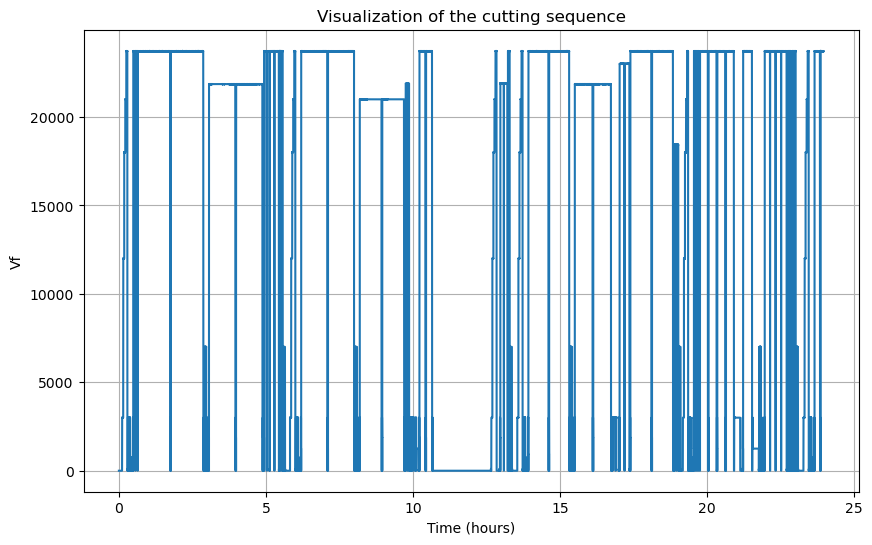

In [76]:
# There are 862574 length of data

## Visualisation of the production sequence:
#tmp=np.arange(0,nb_specimen*0.1,0.1)
#tmpH=tmp/3600
#tmpH # can be imported in DataFrame for abscissa x=..
#data_panda.plot(y='VariableName_XXX')

# Define the number of specimens
nb_specimen = 862574

# Create a time array with 0.1 second intervals
tmp = np.arange(0, nb_specimen * 0.1, 0.1)

# Convert time to hours
tmpH = tmp / 3600

# Assuming you have a DataFrame named 'data' with a column named 'id_ProgP'
N = HSM_data['N']
# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(tmpH, N)
plt.xlabel('Time (hours)')
plt.ylabel('Vf')
plt.title('Visualization of the cutting sequence')
plt.grid(True)
plt.show()

In [77]:
# To facilitate futur use, we can create a set with the variables labels, 

Input_cols = ['Vf','N']

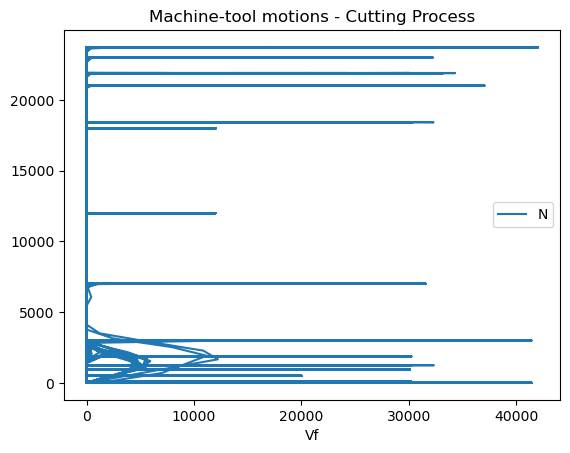

In [78]:
# plots

# Visualize the machine-tool motions with df.plot:
cuttingdata.plot(x='Vf', y='N')
plt.title('Machine-tool motions - Cutting Process')
plt.show()

## Unsupervised machine learning with Kmeans


In [79]:
## First tests of KMeans, progressively:

# Define the cluster model (with max_iter=50,init='random')
kmeans = KMeans(n_clusters=3, max_iter=50, init='random')

# Train the kmeans model (centroids) from the dataset
kmeans.fit(cuttingdata)

# Where are the centroids positions? (kmeans.cluster_centers_)
centroids_cutting= kmeans.cluster_centers_

# Compute the inertia = intra-cluster variance (kmeans.inertia_)
inertia_cutting = kmeans.inertia_

# Prediction: affect each observation of the dataset, to the closest centroid (kmeans.predict)
predictions_cutting = kmeans.predict(cuttingdata)

# From the cluster label of each point in the dataset (array), make a DataFrame and concatenate to the dataset
cluster_labels = pd.DataFrame({'predicted_cluster': predictions_cutting})
cuttingdf = pd.concat([cuttingdata, cluster_labels], axis=1)

# Similarly, make a DataFrame with the centroid positions
centroids_cutting = pd.DataFrame(centroids_cutting)

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [80]:
centroids_cutting.columns=[ 'Vf', 'N']
print(centroids_cutting)

             Vf             N
0   1298.508587    859.341054
1   4738.521140  22883.788794
2  18751.309910  18967.638641


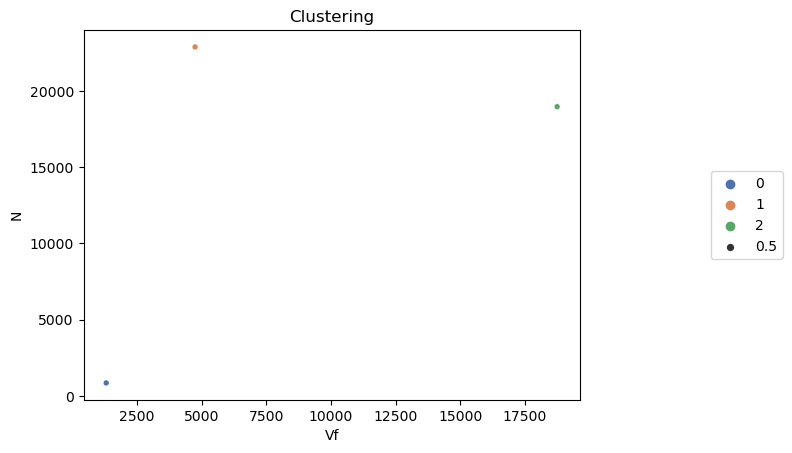

In [81]:
## Visualize the results of clustering

sns.scatterplot( data=centroids_cutting, x='Vf', y='N', hue=centroids_cutting.index, size=0.5, palette='deep')
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Clustering')
plt.show()

In [82]:
import copy
Norm_cutting = centroids_cutting.reset_index()
print(Norm_cutting.keys())

# Normalisation
Norm_cutting[Input_cols]=(Norm_cutting[Input_cols]-Norm_cutting[Input_cols].min())/(Norm_cutting[Input_cols].max()-Norm_cutting[Input_cols].min())
print(Norm_cutting[Input_cols])

Index(['index', 'Vf', 'N'], dtype='object')
         Vf         N
0  0.000000  0.000000
1  0.197104  1.000000
2  1.000000  0.822191


[1 2 3 4 5 6 7 8 9]


C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


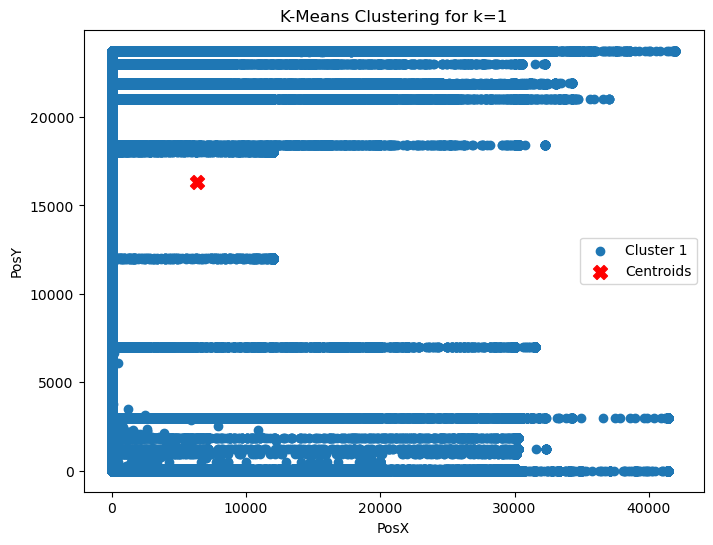

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


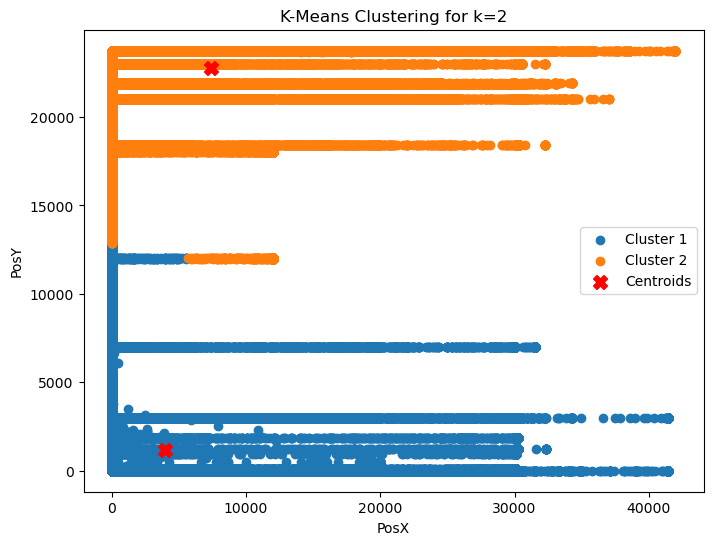

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


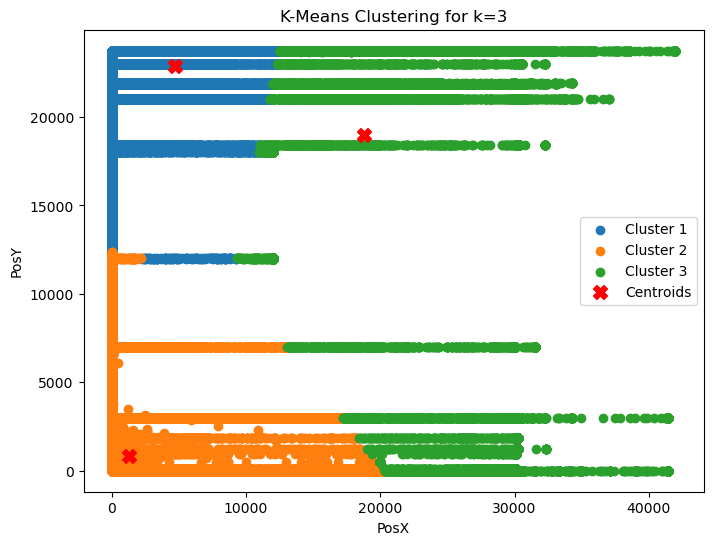

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


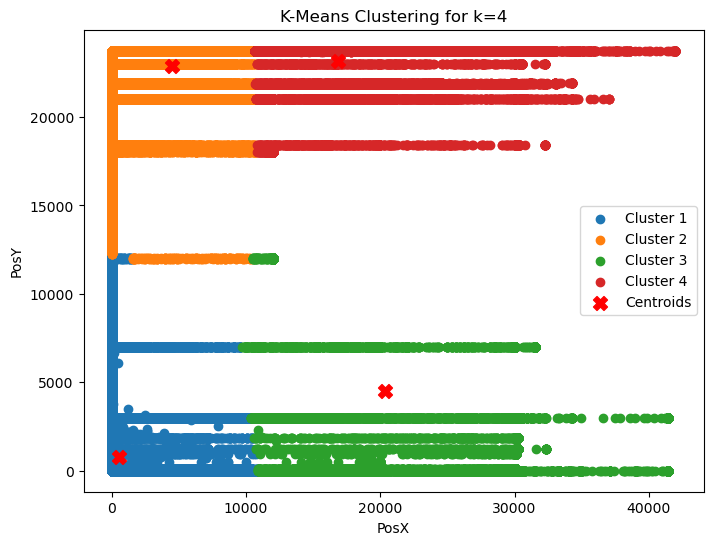

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


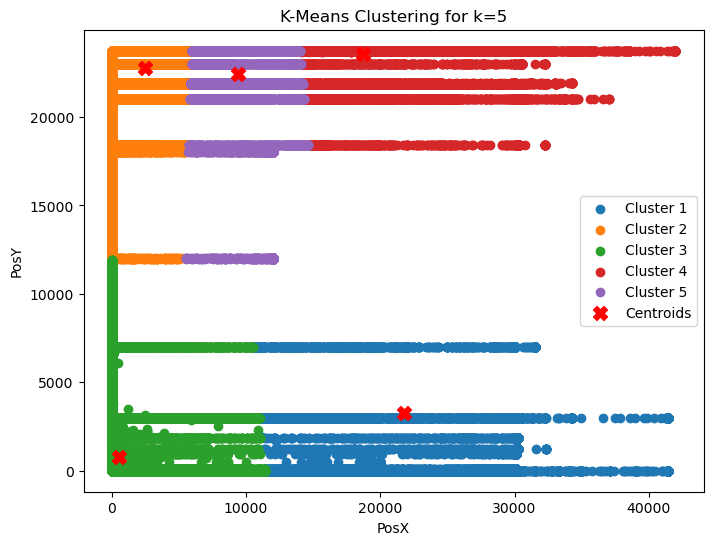

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


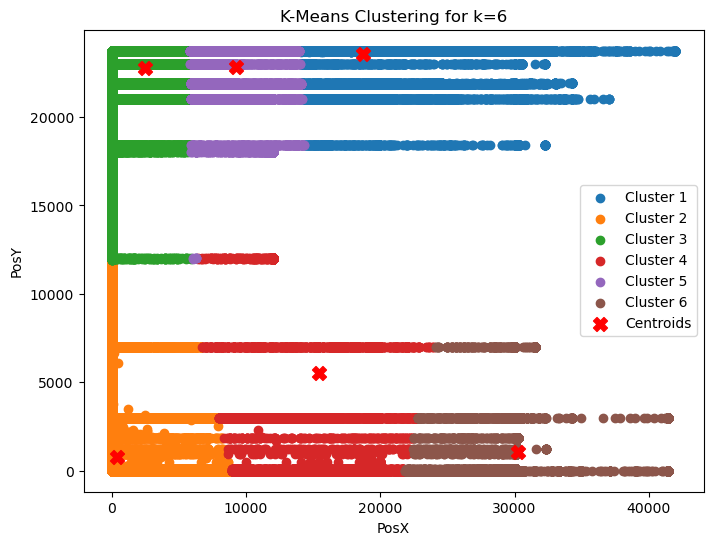

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


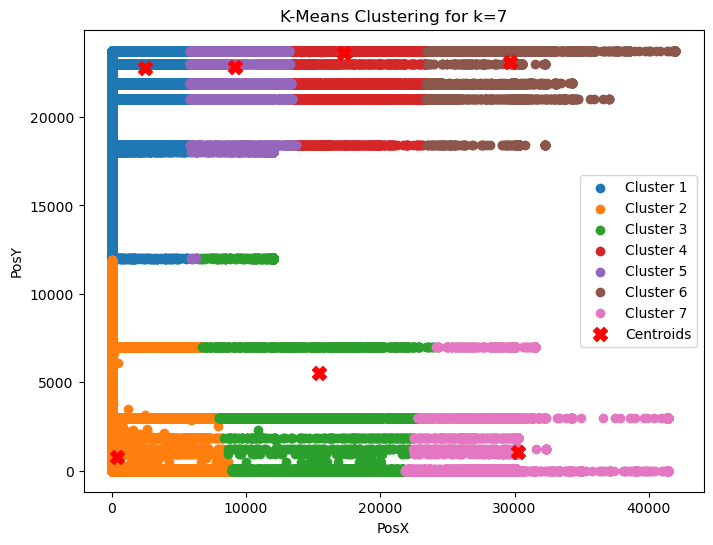

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


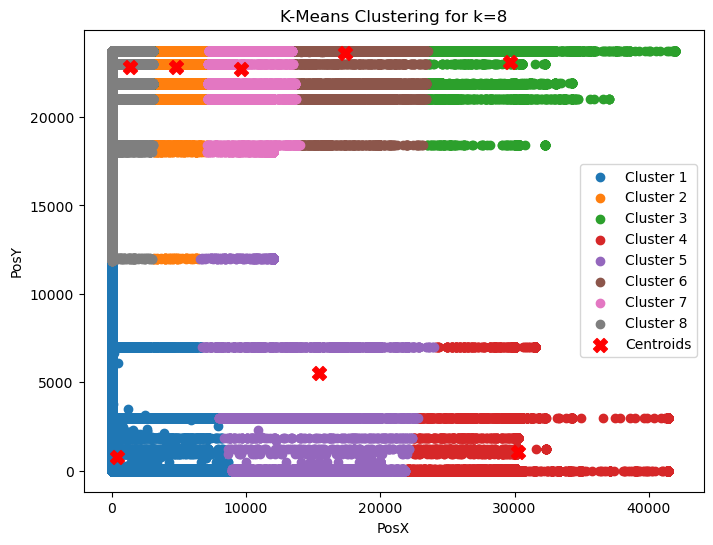

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


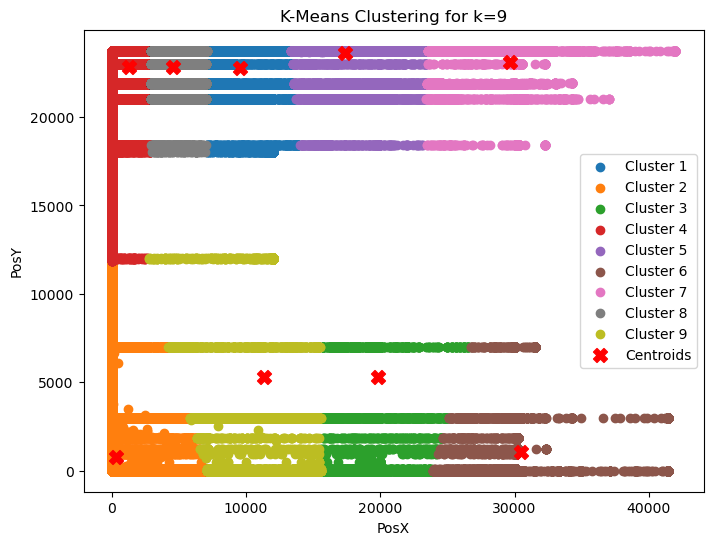

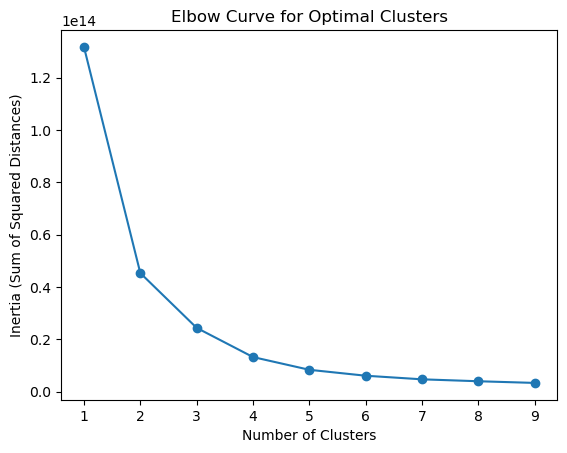

Optimal number of clusters: 2
Optimal number of clusters: 2


In [84]:
def find_optimal_clusters(range_n_clusters, ssd):
    deltas = np.diff(ssd, 2)
    elbow_index = np.argmax(deltas) + 2
    optimal_clusters = range_n_clusters[elbow_index - 1]
    return optimal_clusters

def My_function_kmeans_elbow(max_clusters, df):
    ssd = []
    range_n_clusters = np.arange(1, max_clusters + 1, 1)
    print(range_n_clusters)
    for num_clusters in range_n_clusters:
        
        # Launch the clustering
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(df)
        ssd.append(kmeans.inertia_)

        # Plotting the clustering
        plt.figure(figsize=(8, 6))
        for i in range(num_clusters):
            cluster_indices = np.where(kmeans.labels_ == i)[0]
            plt.scatter(df.iloc[cluster_indices, 0], df.iloc[cluster_indices, 1], label=f'Cluster {i + 1}')
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X', label='Centroids')
        plt.title(f'K-Means Clustering for k={num_clusters}')
        plt.xlabel('PosX')
        plt.ylabel('PosY')
        plt.legend()
        plt.show()

    # Plotting Elbow Curve for Optimal Clusters
    plt.plot(range_n_clusters, ssd, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia (Sum of Squared Distances)')
    plt.title('Elbow Curve for Optimal Clusters')
    plt.show()

    # Find the optimal number of clusters
    optimal_clusters = find_optimal_clusters(range_n_clusters, ssd)
    print("Optimal number of clusters:", optimal_clusters)
    return optimal_clusters

# Example usage
# Assuming cuttingdata is defined somewhere in your code
optimal_clusters = My_function_kmeans_elbow(9, cuttingdata)
print("Optimal number of clusters:", optimal_clusters)

## Unsupervised machine learning with GMM

In [85]:
#funtion to draw mutlivariate Gaussian

def multivariate_gaussian(pos, mu, Sigma):
 """Return the multivariate Gaussian distribution on array pos.
 pos is an array constructed by packing the meshed arrays of variables
 x_1, x_2, x_3, ..., x_k into its _last_ dimension.
 """
 n = mu.shape[0]
 Sigma_det = np.linalg.det(Sigma)
 Sigma_inv = np.linalg.inv(Sigma)
 N = np.sqrt((2*np.pi)**n * Sigma_det)

 # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
 # way across all the input variables.
 fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
 return np.exp(-fac / 2) / N

In [86]:
# Generate sample data (replace this with your actual data)

cuttingdata, _ = make_blobs(n_samples=300, centers=3, random_state=42)

In [87]:
# Tests of the GMM functions:
# define the GMM model
nb_GMM=3
gmm = GaussianMixture(n_components=nb_GMM, covariance_type="full")

# learning of the GMM model by EM algo (Expectation Maximisation)
gmm.fit(cuttingdata)

# result?
m=gmm.means_
cov=gmm.covariances_
w=gmm.weights_

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [88]:
# apply the GMM model, as a classifier:
gmm.predict(cuttingdata)

array([1, 1, 2, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2,
       0, 1, 2, 1, 1, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0,
       2, 2, 1, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1, 2, 0, 2, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 2, 1, 2, 0, 1, 1, 2,
       0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1,
       0, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 1, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0, 1,
       2, 0, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       2, 1, 2, 2, 0, 0, 2, 0, 1, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1,
       1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 2,
       0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 2, 0, 0, 2, 1, 2, 0, 2, 1, 1], d

C:\Users\nithi\AppData\Local\Temp\ipykernel_65388\2699856353.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=cuttingdata[:, 0], y=cuttingdata[:, 1], palette=color_dict_cluster)


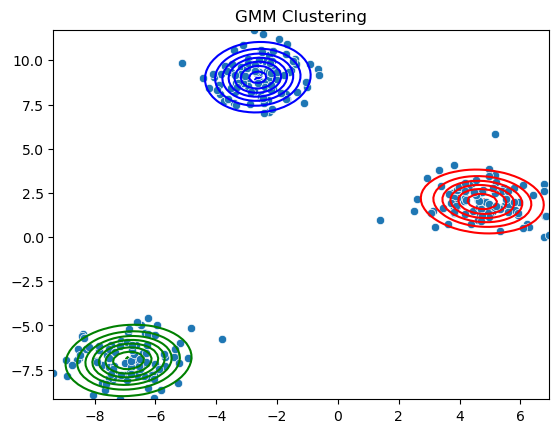

In [89]:
# Define colors for clusters (replace with your actual color choices)
color_dict_cluster = ['red', 'green', 'blue']

# Plotting of GMM
x = np.linspace(cuttingdata[:, 0].min(), cuttingdata[:, 0].max(), 100)
y = np.linspace(cuttingdata[:, 1].min(), cuttingdata[:, 1].max(), 100)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
for i in range(nb_GMM):
 mu_broadcast = np.expand_dims(m[i], axis=(0, 1))
 cov_inv = np.linalg.inv(cov[i])
    
 # Calculate the squared Mahalanobis distance directly
 diff = pos - mu_broadcast
 fac = np.sum(diff @ cov_inv * diff, axis=-1)
 Z = np.exp(-fac / 2) / np.sqrt((2 * np.pi)**2 * np.linalg.det(cov[i]))
 plt.contour(X, Y, Z, colors=color_dict_cluster[i])
 plt.scatter(m[i, 0], m[i, 1], marker='X', c=color_dict_cluster[i], s=30)
    
# Scatter plot of the original data
sns.scatterplot(x=cuttingdata[:, 0], y=cuttingdata[:, 1], palette=color_dict_cluster)
plt.title("GMM Clustering")
plt.show()

## Knowledge integration

In [90]:
# print(HSM_data)

# Select only two specific columns
selected_columns = ['PosX','PosY','PosZ','Vf', 'N','P',]
KI_data =HSM_data[selected_columns]
print(KI_data)

            PosX      PosY     PosZ         Vf          N       P
0      -2200.028  1199.989  800.002      0.000      0.000   0.000
1      -2200.028  1199.989  800.002      0.000      0.000   0.000
2      -2200.028  1199.989  800.002      0.000      0.000   0.000
3      -2200.028  1199.989  800.002      0.000      0.000   0.000
4      -2200.028  1199.989  800.002      0.000      0.000   0.000
...          ...       ...      ...        ...        ...     ...
862569  -588.007   153.989  188.004  17789.728  23723.903  20.392
862570  -557.987   153.989  188.004  17789.728  23717.312  20.392
862571  -527.005   153.989  188.004  17789.728  23718.044  20.392
862572  -496.985   153.989  188.004  17789.728  23725.368  20.392
862573  -467.034   153.989  188.004  17789.728  23720.608  20.392

[862574 rows x 6 columns]


In [91]:
# Calculate actual event
Actual_Event = KI_data.apply(lambda row: row['PosX'] == 6 and row['Vf'] > 85, axis=1)
print(Actual_Event)

# Add the actual event to the main KI_data
KI_data['Actual_Event'] = Actual_Event
print(KI_data)

0         False
1         False
2         False
3         False
4         False
          ...  
862569    False
862570    False
862571    False
862572    False
862573    False
Length: 862574, dtype: bool
            PosX      PosY     PosZ         Vf          N       P  \
0      -2200.028  1199.989  800.002      0.000      0.000   0.000   
1      -2200.028  1199.989  800.002      0.000      0.000   0.000   
2      -2200.028  1199.989  800.002      0.000      0.000   0.000   
3      -2200.028  1199.989  800.002      0.000      0.000   0.000   
4      -2200.028  1199.989  800.002      0.000      0.000   0.000   
...          ...       ...      ...        ...        ...     ...   
862569  -588.007   153.989  188.004  17789.728  23723.903  20.392   
862570  -557.987   153.989  188.004  17789.728  23717.312  20.392   
862571  -527.005   153.989  188.004  17789.728  23718.044  20.392   
862572  -496.985   153.989  188.004  17789.728  23725.368  20.392   
862573  -467.034   153.989  188.004  

C:\Users\nithi\AppData\Local\Temp\ipykernel_65388\1015651257.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KI_data['Actual_Event'] = Actual_Event


In [94]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

# Define business rules
def apply_business_rules(row):
    if (row["PosX"] >= 6) and (row["PosX"] <= 7) and (row["Vf"] > 85):
        return 1  # Event occurred (TRUE)
    else:
        return 0  # Event did not occur (FALSE)

# Apply business rules to create a new column 'Predicted_Event'
KI_data['Predicted_Event'] = KI_data.apply(apply_business_rules, axis=1)
print(KI_data['Predicted_Event'])

# Compute confusion matrix
conf_matrix = confusion_matrix(KI_data['Actual_Event'], KI_data['Predicted_Event'])

# Calculate repeatability
recall = recall_score(KI_data['Actual_Event'], KI_data['Predicted_Event'])

# Display results
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nRepeatability:", recall)

# Calculate evaluation metrics
accuracy = accuracy_score(KI_data['Actual_Event'], KI_data['Predicted_Event'])
recall = recall_score(KI_data['Actual_Event'], KI_data['Predicted_Event'])
precision = precision_score(KI_data['Actual_Event'], KI_data['Predicted_Event'])
f1 = f1_score(KI_data['Actual_Event'], KI_data['Predicted_Event'])

# Display results
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1:", f1)

C:\Users\nithi\AppData\Local\Temp\ipykernel_65388\3909810651.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KI_data['Predicted_Event'] = KI_data.apply(apply_business_rules, axis=1)


0         0
1         0
2         0
3         0
4         0
         ..
862569    0
862570    0
862571    0
862572    0
862573    0
Name: Predicted_Event, Length: 862574, dtype: int64


C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Confusion Matrix:
[[862299    275]
 [     0      0]]

Repeatability: 0.0


C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Evaluation Metrics:
Accuracy: 0.9996811867735406
Recall: 0.0
Precision: 0.0
F1: 0.0


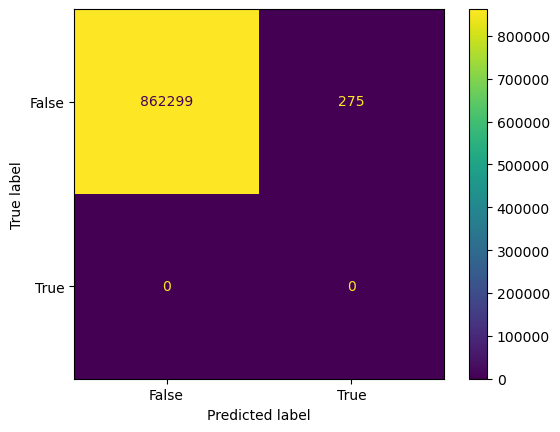

In [95]:
import matplotlib.pyplot as plt
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix , display_labels = [False, True])
cm_display.plot()
plt.show()

# Objective 3: productivity

## Global OEE

In [97]:
# Select only two specific columns

selected_columns = ['tpsT','tps B','PosX','PosY','PosZ','Vf', 'N','P',]
KI_data2 = HSM_data[selected_columns]
print(KI_data2)

           tpsT    tps B      PosX      PosY     PosZ         Vf          N  \
0       5560779  4105603 -2200.028  1199.989  800.002      0.000      0.000   
1       5560780  4105603 -2200.028  1199.989  800.002      0.000      0.000   
2       5560781  4105603 -2200.028  1199.989  800.002      0.000      0.000   
3       5560782  4105603 -2200.028  1199.989  800.002      0.000      0.000   
4       5560783  4105603 -2200.028  1199.989  800.002      0.000      0.000   
...         ...      ...       ...       ...      ...        ...        ...   
862569  6423348  4802871  -588.007   153.989  188.004  17789.728  23723.903   
862570  6423349  4802872  -557.987   153.989  188.004  17789.728  23717.312   
862571  6423350  4802873  -527.005   153.989  188.004  17789.728  23718.044   
862572  6423351  4802874  -496.985   153.989  188.004  17789.728  23725.368   
862573  6423352  4802875  -467.034   153.989  188.004  17789.728  23720.608   

             P  
0        0.000  
1        0.000  


In [98]:
# Calculate the 90th percentile for each column
threshold_X = KI_data2["PosX"].quantile(0.9)
threshold_Y = KI_data2["PosY"].quantile(0.9)
threshold_Z = KI_data2["PosZ"].quantile(0.9)

# Assuming KI_data2 is your DataFrame
malfunction_time = (KI_data2["PosX"] > threshold_X) & (KI_data2["PosY"] > threshold_Y) & (KI_data2["PosZ"] > threshold_Z)

# Use the boolean mask to filter the DataFrame
malfunctioned_data = KI_data2[malfunction_time]
print(malfunctioned_data )

           tpsT    tps B      PosX      PosY   PosZ         Vf          N  \
4229    5565008  4105934  1042.973  1000.013  650.0  11999.693   3000.782   
4230    5565009  4105935  1063.032  1000.013  650.0  11999.693   3001.148   
4231    5565010  4105936  1083.985  1000.013  650.0  11999.693   3000.050   
4232    5565011  4105937  1103.975  1000.013  650.0  11999.693   3001.148   
4233    5565012  4105938  1123.966  1000.013  650.0  11999.693   3001.148   
...         ...      ...       ...       ...    ...        ...        ...   
844104  6404883  4789368  1999.015  1000.013  650.0      0.000  23724.636   
844105  6404884  4789369  1999.977   997.990  650.0   4859.998  23713.649   
844106  6404885  4789370  1999.977   985.009  650.0  11960.783  23715.480   
844107  6404886  4789371  1999.977   964.011  650.0  11999.693  23717.678   
844108  6404887  4789372  1999.977   944.006  650.0  11999.693  23724.270   

            P  
4229    0.000  
4230    0.000  
4231    0.000  
4232    0.0

In [99]:

scheduled_production_time = (KI_data2["tps B"] - KI_data2["tpsT"]) / 60
idle_time = (KI_data2["Vf"] == 1).sum() * scheduled_production_time

# malfunction_time = (KI_data2["is_malfunctioned"] == 1).sum() * scheduled_production_time
malfunction_time = len(malfunctioned_data) * scheduled_production_time
downtime = idle_time + malfunction_time
production_time = scheduled_production_time - downtime

# Calculate availability
availability = (scheduled_production_time - downtime) / scheduled_production_time

# Calculate performance
performance = (production_time / (scheduled_production_time - downtime)) * 100

# Calculate the number of good units
number_of_good_units = len(KI_data2) - len(malfunctioned_data)

# Calculate the total number of units
total_number_of_units = len(KI_data2)

# Calculate quality
quality = (number_of_good_units / total_number_of_units) * 100

# Calculate OEE
oee = availability * performance * quality
print("Availability:", availability)
print("Performance:", performance)
print("Quality:", quality)
print("OEE:", oee)

Availability: 0        -3243.0
1        -3243.0
2        -3243.0
3        -3243.0
4        -3243.0
           ...  
862569   -3243.0
862570   -3243.0
862571   -3243.0
862572   -3243.0
862573   -3243.0
Length: 862574, dtype: float64
Performance: 0         100.0
1         100.0
2         100.0
3         100.0
4         100.0
          ...  
862569    100.0
862570    100.0
862571    100.0
862572    100.0
862573    100.0
Length: 862574, dtype: float64
Quality: 99.62391632486025
OEE: 0        -3.230804e+07
1        -3.230804e+07
2        -3.230804e+07
3        -3.230804e+07
4        -3.230804e+07
              ...     
862569   -3.230804e+07
862570   -3.230804e+07
862571   -3.230804e+07
862572   -3.230804e+07
862573   -3.230804e+07
Length: 862574, dtype: float64


##  OEE per program

In [100]:
# Assuming you have a DataFrame named 'df' with a column named 'your_column'
# Replace 'your_column' and 'your_data.csv' with your actual column name and data source
# list of values of 'idProgP' 
#31,3,32,2,28,34,35,36

# Load the data into a DataFrame
HSM_data = pd.read_csv('data777.csv')

# Get the unique values in the 'is_malfunctioned' column
unique_values = HSM_data ['id_ProgP'].unique()
print("Unique values in the 'id_ProgP' column:", unique_values) 

Unique values in the 'id_ProgP' column: [31  3 32 28 33  2 34 35 36]


In [102]:
# Data Selection
OEE_data_31 = HSM_data[HSM_data['id_ProgP'] == 31]
print(OEE_data_31)

# Calculate the 90th percentile for each column
threshold_X = OEE_data_31["PosX"].quantile(0.9)
threshold_Y = OEE_data_31["PosY"].quantile(0.9)
threshold_Z = OEE_data_31["PosZ"].quantile(0.9)

# Assuming KI_data2 is your DataFrame
malfunction_time = (OEE_data_31["PosX"] > threshold_X) & (OEE_data_31["PosY"] > threshold_Y) & (OEE_data_31["PosZ"] > threshold_Z)

# Use the boolean mask to filter the DataFrame
malfunctioned_data = OEE_data_31[malfunction_time]
print(malfunctioned_data )
scheduled_production_time = (OEE_data_31["tps B"] - OEE_data_31["tpsT"]) / 60
idle_time = (OEE_data_31["Vf"] == 1).sum() * scheduled_production_time

# malfunction_time = (KI_data2["is_malfunctioned"] == 1).sum() * scheduled_production_time
malfunction_time = len(malfunctioned_data) * scheduled_production_time
downtime = idle_time + malfunction_time
production_time = scheduled_production_time - downtime

# Calculate availability
availability = (scheduled_production_time - downtime) / scheduled_production_time

# Calculate performance
performance = (production_time / (scheduled_production_time - downtime)) * 100

# Calculate the number of good units
number_of_good_units = len(OEE_data_31) - len(malfunctioned_data)

# Calculate the total number of units
total_number_of_units = len(OEE_data_31)

# Calculate quality
quality = (number_of_good_units / total_number_of_units) * 100

# Calculate OEE
oee = availability * performance * quality
print("Availability:", availability)
print("Performance:", performance)
print("Quality:", quality)
print("OEE:", oee)

           tpsT    tps B       date  id_ProgP  id pc  mode  id_outil  n outil  \
0       5560779  4105603  190312004        31     69     2         0        0   
1       5560780  4105603  190312005        31     69     2         0        0   
2       5560781  4105603  190312006        31     69     2         0        0   
3       5560782  4105603  190312007        31     69     2         0        0   
4       5560783  4105603  190312008        31     69     2         0        0   
...         ...      ...        ...       ...    ...   ...       ...      ...   
203418  5764197  4292619  191208034        31     69     2         7        0   
203419  5764198  4292619  191208035        31     69     2         7        0   
203420  5764199  4292619  191208036        31     69     2         7        0   
203421  5764200  4292619  191208037        31     69     2         7        0   
203422  5764201  4292619  191208038        31     69     2         7        0   

        usure outil  nligne

In [103]:
# Data Selection
OEE_data_3 = HSM_data[HSM_data['id_ProgP'] == 3]
print(OEE_data_3)

# Calculate the 90th percentile for each column
threshold_X = OEE_data_3["PosX"].quantile(0.9)
threshold_Y = OEE_data_3["PosY"].quantile(0.9)
threshold_Z = OEE_data_3["PosZ"].quantile(0.9)

# Assuming KI_data2 is your DataFrame
malfunction_time = (OEE_data_3["PosX"] > threshold_X) & (OEE_data_3["PosY"] > threshold_Y) & (OEE_data_3["PosZ"] > threshold_Z)

#Use the boolean mask to filter the DataFrame
malfunctioned_data = OEE_data_3[malfunction_time]
print(malfunctioned_data )
scheduled_production_time = (OEE_data_3["tps B"] - OEE_data_3["tpsT"]) / 60
idle_time = (OEE_data_3["Vf"] == 1).sum() * scheduled_production_time

# malfunction_time = (KI_data2["is_malfunctioned"] == 1).sum() * scheduled_production_time
malfunction_time = len(malfunctioned_data) * scheduled_production_time
downtime = idle_time + malfunction_time
production_time = scheduled_production_time - downtime

# Calculate availability
availability = (scheduled_production_time - downtime) / scheduled_production_time

# Calculate performance
performance = (production_time / (scheduled_production_time - downtime)) * 100

# Calculate the number of good units
number_of_good_units = len(OEE_data_3) - len(malfunctioned_data)

# Calculate the total number of units
total_number_of_units = len(OEE_data_3)

# Calculate quality
quality = (number_of_good_units / total_number_of_units) * 100

# Calculate OEE
oee = availability * performance * quality
print("Availability:", availability)
print("Performance:", performance)
print("Quality:", quality)
print("OEE:", oee)

           tpsT    tps B       date  id_ProgP  id pc  mode  id_outil  n outil  \
203423  5764202  4292619  191208039         3     33     2         7        0   
203424  5764203  4292619  191208040         3     33     2         7        0   
203425  5764204  4292619  191208041         3     33     2         7        0   
203426  5764205  4292619  191208048         3     33     2         7        0   
203427  5764206  4292619  191208049         3     33     2         7        0   
...         ...      ...        ...       ...    ...   ...       ...      ...   
837954  6398733  4783338  192367140         3     33     2         0        0   
837955  6398734  4783338  192367141         3     33     2         0        0   
837956  6398735  4783338  192367142         3     33     2         0        0   
837957  6398736  4783338  192367143         3     33     2         0        0   
837958  6398737  4783338  192367144         3     33     2         0        0   

        usure outil  nligne

In [104]:
# Data Selection
OEE_data_32 = HSM_data[HSM_data['id_ProgP'] == 32]
print(OEE_data_32)

# Calculate the 90th percentile for each column
threshold_X = OEE_data_32["PosX"].quantile(0.9)
threshold_Y = OEE_data_32["PosY"].quantile(0.9)
threshold_Z = OEE_data_32["PosZ"].quantile(0.9)

# Assuming KI_data2 is your DataFrame
malfunction_time = (OEE_data_32["PosX"] > threshold_X) & (OEE_data_32["PosY"] > threshold_Y) & (OEE_data_32["PosZ"] > threshold_Z)

# Use the boolean mask to filter the DataFrame
malfunctioned_data = OEE_data_32[malfunction_time]
print(malfunctioned_data )
scheduled_production_time = (OEE_data_32["tps B"] - OEE_data_32["tpsT"]) / 60
idle_time = (OEE_data_32["Vf"] == 1).sum() * scheduled_production_time

# malfunction_time = (KI_data2["is_malfunctioned"] == 1).sum() * scheduled_production_time
malfunction_time = len(malfunctioned_data) * scheduled_production_time
downtime = idle_time + malfunction_time
production_time = scheduled_production_time - downtime

# Calculate availability
availability = (scheduled_production_time - downtime) / scheduled_production_time

# Calculate performance
performance = (production_time / (scheduled_production_time - downtime)) * 100

# Calculate the number of good units
number_of_good_units = len(OEE_data_32) - len(malfunctioned_data)

# Calculate the total number of units
total_number_of_units = len(OEE_data_32)

# Calculate quality
quality = (number_of_good_units / total_number_of_units) * 100

# Calculate OEE
oee = availability * performance * quality
print("Availability:", availability)
print("Performance:", performance)
print("Quality:", quality)
print("OEE:", oee)

           tpsT    tps B       date  id_ProgP  id pc  mode  id_outil  n outil  \
206071  5766850  4292619  191212597        32     70     2         0        0   
206072  5766851  4292619  191212598        32     70     2         0        0   
206073  5766852  4292619  191212599        32     70     2         0        0   
206074  5766853  4292619  191212600        32     70     2         0        0   
206075  5766854  4292619  191212601        32     70     2         0        0   
...         ...      ...        ...       ...    ...   ...       ...      ...   
481254  6042033  4473434  191717433        32     70     2         7        0   
481255  6042034  4473434  191717440        32     70     2         7        0   
481256  6042035  4473434  191717441        32     70     2         7        0   
481257  6042036  4473434  191717442        32     70     2         7        0   
481258  6042037  4473434  191717443        32     70     2         7        0   

        usure outil  nligne

In [105]:
# Data Selection
OEE_data_28 = HSM_data[HSM_data['id_ProgP'] == 28]
print(OEE_data_28)

# Calculate the 90th percentile for each column
threshold_X = OEE_data_28["PosX"].quantile(0.9)
threshold_Y = OEE_data_28["PosY"].quantile(0.9)
threshold_Z = OEE_data_28["PosZ"].quantile(0.9)

# Assuming KI_data2 is your DataFrame
malfunction_time = (OEE_data_28["PosX"] > threshold_X) & (OEE_data_28["PosY"] > threshold_Y) & (OEE_data_28["PosZ"] > threshold_Z)

# Use the boolean mask to filter the DataFrame
malfunctioned_data = OEE_data_28[malfunction_time]
print(malfunctioned_data )
scheduled_production_time = (OEE_data_28["tps B"] - OEE_data_28["tpsT"]) / 60
idle_time = (OEE_data_28["Vf"] == 1).sum() * scheduled_production_time

# malfunction_time = (KI_data2["is_malfunctioned"] == 1).sum() * scheduled_production_time
malfunction_time = len(malfunctioned_data) * scheduled_production_time
downtime = idle_time + malfunction_time
production_time = scheduled_production_time - downtime

# Calculate availability
availability = (scheduled_production_time - downtime) / scheduled_production_time

# Calculate performance
performance = (production_time / (scheduled_production_time - downtime)) * 100

# Calculate the number of good units
number_of_good_units = len(OEE_data_28) - len(malfunctioned_data)

# Calculate the total number of units
total_number_of_units = len(OEE_data_28)

# Calculate quality
quality = (number_of_good_units / total_number_of_units) * 100

# Calculate OEE
oee = availability * performance * quality
print("Availability:", availability)
print("Performance:", performance)
print("Quality:", quality)
print("OEE:", oee)

           tpsT    tps B       date  id_ProgP  id pc  mode  id_outil  n outil  \
397588  5958367  4453828  191564020        28     66     0        36        0   
397589  5958368  4453828  191564021        28     66     0        36        0   
397590  5958369  4453828  191564022        28     66     0        36        0   
397591  5958370  4453828  191564023        28     66     0        36        0   
397592  5958371  4453828  191564024        28     66     0        36        0   
...         ...      ...        ...       ...    ...   ...       ...      ...   
455064  6015843  4453828  191668617        28     66     2        40        0   
455065  6015844  4453828  191668624        28     66     2        40        0   
455066  6015845  4453828  191668625        28     66     2        40        0   
455067  6015846  4453828  191668626        28     66     2        40        0   
455068  6015847  4453828  191668627        28     66     2        40        0   

        usure outil  nligne

In [106]:
# Data Selection
OEE_data_33 = HSM_data[HSM_data['id_ProgP'] == 33]
print(OEE_data_33)

# Calculate the 90th percentile for each column
threshold_X = OEE_data_33["PosX"].quantile(0.9)
threshold_Y = OEE_data_33["PosY"].quantile(0.9)
threshold_Z = OEE_data_33["PosZ"].quantile(0.9)

# Assuming KI_data2 is your DataFrame
malfunction_time = (OEE_data_33["PosX"] > threshold_X) & (OEE_data_33["PosY"] > threshold_Y) & (OEE_data_33["PosZ"] > threshold_Z)

# Use the boolean mask to filter the DataFrame
malfunctioned_data = OEE_data_33[malfunction_time]
print(malfunctioned_data )
scheduled_production_time = (OEE_data_33["tps B"] - OEE_data_33["tpsT"]) / 60
idle_time = (OEE_data_33["Vf"] == 1).sum() * scheduled_production_time

# malfunction_time = (KI_data2["is_malfunctioned"] == 1).sum() * scheduled_production_time
malfunction_time = len(malfunctioned_data) * scheduled_production_time
downtime = idle_time + malfunction_time
production_time = scheduled_production_time - downtime

# Calculate availability
availability = (scheduled_production_time - downtime) / scheduled_production_time

# Calculate performance
performance = (production_time / (scheduled_production_time - downtime)) * 100

# Calculate the number of good units
number_of_good_units = len(OEE_data_33) - len(malfunctioned_data)

# Calculate the total number of units
total_number_of_units = len(OEE_data_33)

# Calculate quality
quality = (number_of_good_units / total_number_of_units) * 100

# Calculate OEE
oee = availability * performance * quality
print("Availability:", availability)
print("Performance:", performance)
print("Quality:", quality)
print("OEE:", oee)

           tpsT    tps B       date  id_ProgP  id pc  mode  id_outil  n outil  \
399384  5960163  4453828  191567412        33     71     0        40        0   
399385  5960164  4453828  191567413        33     71     0        40        0   
409428  5970207  4453828  191584905        33     71     0        40        0   
440954  6001733  4453828  191643191        33     71     0        40        0   
440955  6001734  4453828  191643192        33     71     0        40        0   
447045  6007824  4453828  191654960        33     71     0        40        0   

        usure outil  nligne  ...  FFT_15  FFT_16  FFT_17  FFT_18  FFT_19  \
399384            0       0  ...     0.0     0.0     0.0     0.0     0.0   
399385            0       0  ...     0.0     0.0     0.0     0.0     0.0   
409428            0       0  ...     0.0     0.0     0.0     0.0     0.0   
440954            0       0  ...     0.0     0.0     0.0     0.0     0.0   
440955            0       0  ...     0.0     0.0    

In [107]:
# Data Selection
OEE_data_3 = HSM_data[HSM_data['id_ProgP'] == 3]
print(OEE_data_3)

# Calculate the 90th percentile for each column
threshold_X = OEE_data_3["PosX"].quantile(0.9)
threshold_Y = OEE_data_3["PosY"].quantile(0.9)
threshold_Z = OEE_data_3["PosZ"].quantile(0.9)

# Assuming KI_data2 is your DataFrame
malfunction_time = (OEE_data_3["PosX"] > threshold_X) & (OEE_data_3["PosY"] > threshold_Y) & (OEE_data_3["PosZ"] > threshold_Z)

# Use the boolean mask to filter the DataFrame
malfunctioned_data = OEE_data_3[malfunction_time]
print(malfunctioned_data )
scheduled_production_time = (OEE_data_3["tps B"] - OEE_data_3["tpsT"]) / 60
idle_time = (OEE_data_3["Vf"] == 1).sum() * scheduled_production_time

# malfunction_time = (KI_data2["is_malfunctioned"] == 1).sum() * scheduled_production_time
malfunction_time = len(malfunctioned_data) * scheduled_production_time
downtime = idle_time + malfunction_time
production_time = scheduled_production_time - downtime

# Calculate availability
availability = (scheduled_production_time - downtime) / scheduled_production_time

# Calculate performance
performance = (production_time / (scheduled_production_time - downtime)) * 100

# Calculate the number of good units
number_of_good_units = len(OEE_data_3) - len(malfunctioned_data)

# Calculate the total number of units
total_number_of_units = len(OEE_data_3)

# Calculate quality
quality = (number_of_good_units / total_number_of_units) * 100

# Calculate OEE
oee = availability * performance * quality
print("Availability:", availability)
print("Performance:", performance)
print("Quality:", quality)
print("OEE:", oee)

           tpsT    tps B       date  id_ProgP  id pc  mode  id_outil  n outil  \
203423  5764202  4292619  191208039         3     33     2         7        0   
203424  5764203  4292619  191208040         3     33     2         7        0   
203425  5764204  4292619  191208041         3     33     2         7        0   
203426  5764205  4292619  191208048         3     33     2         7        0   
203427  5764206  4292619  191208049         3     33     2         7        0   
...         ...      ...        ...       ...    ...   ...       ...      ...   
837954  6398733  4783338  192367140         3     33     2         0        0   
837955  6398734  4783338  192367141         3     33     2         0        0   
837956  6398735  4783338  192367142         3     33     2         0        0   
837957  6398736  4783338  192367143         3     33     2         0        0   
837958  6398737  4783338  192367144         3     33     2         0        0   

        usure outil  nligne

In [108]:
# Data Selection
OEE_data_2 = HSM_data[HSM_data['id_ProgP'] == 2]
print(OEE_data_2)

# Calculate the 90th percentile for each column
threshold_X = OEE_data_2["PosX"].quantile(0.9)
threshold_Y = OEE_data_2["PosY"].quantile(0.9)
threshold_Z = OEE_data_2["PosZ"].quantile(0.9)

# Assuming KI_data2 is your DataFrame
malfunction_time = (OEE_data_2["PosX"] > threshold_X) & (OEE_data_2["PosY"] > threshold_Y) & (OEE_data_2["PosZ"] > threshold_Z)

# Use the boolean mask to filter the DataFrame
malfunctioned_data = OEE_data_2[malfunction_time]
print(malfunctioned_data )
scheduled_production_time = (OEE_data_2["tps B"] - OEE_data_2["tpsT"]) / 60
idle_time = (OEE_data_2["Vf"] == 1).sum() * scheduled_production_time

# malfunction_time = (KI_data2["is_malfunctioned"] == 1).sum() * scheduled_production_time
malfunction_time = len(malfunctioned_data) * scheduled_production_time
downtime = idle_time + malfunction_time
production_time = scheduled_production_time - downtime

# Calculate availability
availability = (scheduled_production_time - downtime) / scheduled_production_time

# Calculate performance
performance = (production_time / (scheduled_production_time - downtime)) * 100

# Calculate the number of good units
number_of_good_units = len(OEE_data_2) - len(malfunctioned_data)

# Calculate the total number of units
total_number_of_units = len(OEE_data_2)

# Calculate quality
quality = (number_of_good_units / total_number_of_units) * 100

# Calculate OEE
oee = availability * performance * quality
print("Availability:", availability)
print("Performance:", performance)
print("Quality:", quality)
print("OEE:", oee)

           tpsT    tps B       date  id_ProgP  id pc  mode  id_outil  n outil  \
400100  5960879  4453828  191568624         2     26     1        40        0   
400101  5960880  4453828  191568625         2     26     1        40        0   
400102  5960881  4453828  191568626         2     26     1        40        0   
400103  5960882  4453828  191568627         2     26     1        40        0   
400104  5960883  4453828  191568628         2     26     1        40        0   
...         ...      ...        ...       ...    ...   ...       ...      ...   
463279  6024058  4460283  191682660         2     26     1         0        0   
463280  6024059  4460283  191682661         2     26     1         0        0   
463281  6024060  4460283  191682662         2     26     1         0        0   
463282  6024061  4460283  191682663         2     26     1         0        0   
463283  6024062  4460283  191682664         2     26     1         0        0   

        usure outil  nligne

In [109]:
# Data Selection
OEE_data_34 = HSM_data[HSM_data['id_ProgP'] == 34]
print(OEE_data_34)

# Calculate the 90th percentile for each column
threshold_X = OEE_data_34["PosX"].quantile(0.9)
threshold_Y = OEE_data_34["PosY"].quantile(0.9)
threshold_Z = OEE_data_34["PosZ"].quantile(0.9)

# Assuming KI_data2 is your DataFrame
malfunction_time = (OEE_data_34["PosX"] > threshold_X) & (OEE_data_34["PosY"] > threshold_Y) & (OEE_data_34["PosZ"] > threshold_Z)

# Use the boolean mask to filter the DataFrame
malfunctioned_data = OEE_data_34[malfunction_time]
print(malfunctioned_data )
scheduled_production_time = (OEE_data_34["tps B"] - OEE_data_34["tpsT"]) / 60
idle_time = (OEE_data_34["Vf"] == 1).sum() * scheduled_production_time

# malfunction_time = (KI_data2["is_malfunctioned"] == 1).sum() * scheduled_production_time
malfunction_time = len(malfunctioned_data) * scheduled_production_time
downtime = idle_time + malfunction_time
production_time = scheduled_production_time - downtime

# Calculate availability
availability = (scheduled_production_time - downtime) / scheduled_production_time

# Calculate performance
performance = (production_time / (scheduled_production_time - downtime)) * 100

# Calculate the number of good units
number_of_good_units = len(OEE_data_34) - len(malfunctioned_data)

# Calculate the total number of units
total_number_of_units = len(OEE_data_34)

# Calculate quality
quality = (number_of_good_units / total_number_of_units) * 100

# Calculate OEE
oee = availability * performance * quality
print("Availability:", availability)
print("Performance:", performance)
print("Quality:", quality)
print("OEE:", oee)

           tpsT    tps B       date  id_ProgP  id pc  mode  id_outil  n outil  \
487614  6048393  4473434  191728249        34     72     2         0        0   
487615  6048394  4473434  191728256        34     72     2         0        0   
487616  6048395  4473434  191728257        34     72     2         0        0   
487617  6048396  4473434  191728258        34     72     2         0        0   
487618  6048397  4473434  191728259        34     72     2         0        0   
...         ...      ...        ...       ...    ...   ...       ...      ...   
687734  6248513  4659851  192094404        34     72     2         7        0   
687735  6248514  4659851  192094405        34     72     2         7        0   
687736  6248515  4659851  192094406        34     72     2         7        0   
687737  6248516  4659851  192094407        34     72     2         7        0   
687738  6248517  4659851  192094408        34     72     2         7        0   

        usure outil  nligne

In [110]:
# Data Selection
OEE_data_35 = HSM_data[HSM_data['id_ProgP'] == 35]
print(OEE_data_35)

# Calculate the 90th percentile for each column
threshold_X = OEE_data_35["PosX"].quantile(0.9)
threshold_Y = OEE_data_35["PosY"].quantile(0.9)
threshold_Z = OEE_data_35["PosZ"].quantile(0.9)

# Assuming KI_data2 is your DataFrame
malfunction_time = (OEE_data_35["PosX"] > threshold_X) & (OEE_data_35["PosY"] > threshold_Y) & (OEE_data_35["PosZ"] > threshold_Z)

# Use the boolean mask to filter the DataFrame
malfunctioned_data = OEE_data_35[malfunction_time]
print(malfunctioned_data )
scheduled_production_time = (OEE_data_35["tps B"] - OEE_data_35["tpsT"]) / 60
idle_time = (OEE_data_35["Vf"] == 1).sum() * scheduled_production_time
#

# malfunction_time = (KI_data2["is_malfunctioned"] == 1).sum() * scheduled_production_time
malfunction_time = len(malfunctioned_data) * scheduled_production_time
downtime = idle_time + malfunction_time
production_time = scheduled_production_time - downtime

# Calculate availability
availability = (scheduled_production_time - downtime) / scheduled_production_time

# Calculate performance
performance = (production_time / (scheduled_production_time - downtime)) * 100

# Calculate the number of good units
number_of_good_units = len(OEE_data_35) - len(malfunctioned_data)

# Calculate the total number of units
total_number_of_units = len(OEE_data_35)

# Calculate quality
quality = (number_of_good_units / total_number_of_units) * 100

# Calculate OEE
oee = availability * performance * quality
print("Availability:", availability)
print("Performance:", performance)
print("Quality:", quality)
print("OEE:", oee)

           tpsT    tps B       date  id_ProgP  id pc  mode  id_outil  n outil  \
690310  6251089  4659851  192098784        35     73     2         0        0   
690311  6251090  4659851  192098785        35     73     2         0        0   
690312  6251091  4659851  192098786        35     73     2         0        0   
690313  6251092  4659851  192098787        35     73     2         0        0   
690314  6251093  4659851  192098788        35     73     2         0        0   
...         ...      ...        ...       ...    ...   ...       ...      ...   
831420  6392199  4783338  192355984        35     73     2         7        0   
831421  6392200  4783338  192355985        35     73     2         7        0   
831422  6392201  4783338  192355986        35     73     2         7        0   
831423  6392202  4783338  192355987        35     73     2         7        0   
831424  6392203  4783338  192355988        35     73     2         7        0   

        usure outil  nligne

In [111]:
# Data Selection
OEE_data_36 = HSM_data[HSM_data['id_ProgP'] == 36]
print(OEE_data_36)

# Calculate the 90th percentile for each column
threshold_X = OEE_data_36["PosX"].quantile(0.9)
threshold_Y = OEE_data_36["PosY"].quantile(0.9)
threshold_Z = OEE_data_36["PosZ"].quantile(0.9)

# Assuming KI_data2 is your DataFrame
malfunction_time = (OEE_data_36["PosX"] > threshold_X) & (OEE_data_36["PosY"] > threshold_Y) & (OEE_data_36["PosZ"] > threshold_Z)

# Use the boolean mask to filter the DataFrame
malfunctioned_data = OEE_data_36[malfunction_time]
print(malfunctioned_data )
scheduled_production_time = (OEE_data_36["tps B"] - OEE_data_36["tpsT"]) / 60
idle_time = (OEE_data_36["Vf"] == 1).sum() * scheduled_production_time

# malfunction_time = (KI_data2["is_malfunctioned"] == 1).sum() * scheduled_production_time
malfunction_time = len(malfunctioned_data) * scheduled_production_time
downtime = idle_time + malfunction_time
production_time = scheduled_production_time - downtime

# Calculate availability
availability = (scheduled_production_time - downtime) / scheduled_production_time

# Calculate performance
performance = (production_time / (scheduled_production_time - downtime)) * 100

# Calculate the number of good units
number_of_good_units = len(OEE_data_36) - len(malfunctioned_data)

# Calculate the total number of units
total_number_of_units = len(OEE_data_36)

# Calculate quality
quality = (number_of_good_units / total_number_of_units) * 100

# Calculate OEE
oee = availability * performance * quality
print("Availability:", availability)
print("Performance:", performance)
print("Quality:", quality)
print("OEE:", oee)

           tpsT    tps B       date  id_ProgP  id pc  mode  id_outil  n outil  \
837959  6398738  4783338  192367145        36     74     2         0        0   
837960  6398739  4783338  192367152        36     74     2         0        0   
837961  6398740  4783338  192367153        36     74     2         0        0   
837962  6398741  4783338  192367154        36     74     2         0        0   
837963  6398742  4783338  192367155        36     74     2         0        0   
...         ...      ...        ...       ...    ...   ...       ...      ...   
862569  6423348  4802871  192409145        36     74     2        22        6   
862570  6423349  4802872  192409152        36     74     2        22        6   
862571  6423350  4802873  192409153        36     74     2        22        6   
862572  6423351  4802874  192409154        36     74     2        22        6   
862573  6423352  4802875  192409155        36     74     2        22        6   

        usure outil  nligne

# Objective 4: machining incidents

In [114]:
# import pandas as pd
# Define a threshold for cutting force
threshold = 1000 # Change this value to your desired threshold
threshold = float(threshold)
HSM_data = pd.read_csv('data777.csv')

# Load the data into a DataFrame
selected_columns = ['tpsT','tps B','PosX','PosY','PosZ','Vf', 'N','P',]
KI_data2 = HSM_data[selected_columns]

# Iterate through the 'Vf' column
malfunction_timestamps = []  # Initialize the list
malfunction_durations = []  # Initialize the list

for i, cutting_force_value in enumerate(KI_data2['Vf']):
    cutting_force_str = str(cutting_force_value)

    # Do something with cutting_force_str
    # print(cutting_force_str)  # Replace this line with your desired operation

    # Convert cutting_force_str to the appropriate numeric type
    cutting_force_numeric = float(cutting_force_str)  # Assuming cutting_force_str is a numeric value
    # Do something with cutting_force_numeric
    # print(cutting_force_numeric)

    # Check if the cutting force exceeds the threshold
    if cutting_force_numeric > threshold:

        # If so, add the timestamp to the malfunction timestamps list
        malfunction_timestamps.append(i)

# Calculate malfunction durations
for i in range(len(malfunction_timestamps) - 1):
    start_timestamp = malfunction_timestamps[i]
    end_timestamp = malfunction_timestamps[i + 1]
    malfunction_duration = end_timestamp - start_timestamp
    malfunction_durations.append(malfunction_duration)

# Identify machining incidents
for duration in malfunction_durations:
    if duration > 60:  # Threshold for prolonged malfunction
        # Generate different options for machining incidents
        if cutting_force_numeric < 2000:
            incident_type = 'Minor malfunction'
        elif cutting_force_numeric < 3000:
            incident_type = 'Moderate malfunction'
        else:
            incident_type = 'Major malfunction'
        incident_description = f"Cutting force exceeded the threshold of {threshold} for {duration} seconds. This could lead to premature tool wear, surface defects, or even workpiece breakage."
        print("Machining incident detected:", incident_type, incident_description)


Machining incident detected: Major malfunction Cutting force exceeded the threshold of 1000.0 for 110 seconds. This could lead to premature tool wear, surface defects, or even workpiece breakage.
Machining incident detected: Major malfunction Cutting force exceeded the threshold of 1000.0 for 69 seconds. This could lead to premature tool wear, surface defects, or even workpiece breakage.
Machining incident detected: Major malfunction Cutting force exceeded the threshold of 1000.0 for 93 seconds. This could lead to premature tool wear, surface defects, or even workpiece breakage.
Machining incident detected: Major malfunction Cutting force exceeded the threshold of 1000.0 for 81 seconds. This could lead to premature tool wear, surface defects, or even workpiece breakage.
Machining incident detected: Major malfunction Cutting force exceeded the threshold of 1000.0 for 66 seconds. This could lead to premature tool wear, surface defects, or even workpiece breakage.
Machining incident detec

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f79ea777-74db-4bd2-b452-bdc974d83e9b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>